# Optimal Chinese Restaurant Location

## Abstract

## Introduction

Vancouver has one of the highest concentrations of Chinese people outside the continent of Asia. Chinese account for nearly 28% of the population (Statistics Canada, 2011), which leads to emerging Chinese restaurants over the past decade. The number of Chinese population in Vancouver is likely to continue to grow at a faster rate than the non-Chinese population (Statistics Canada, 2016). An accelerating rise of Chinese restaurants can be expected. Now is a good time for investors to open a Chinese restaurant, the real problem is what is the optimal location?  
Location is important for the success of restaurant because it affects the cost and competition. Locations with high density of population but low density of restaurants in the vicinity are likely to attract more customers. Most restaurant location selection analyses in Vancouver cover rent cost, yet very few address or seriously recognize competition. To address these knowledge gaps, I conduct an assessment of population and restaurant distribution across the City of Vancouver. Local areas are then segmented and clustered accordingly. I assume major customers of Chinese restaurants are Chinese. I pose three questions:
1. How is Chinese population distributed in the City of Vancouver?
2. How are restaurants distributed in the City of Vancouver?
3. Which local area in the City of Vancouver should the investor open a Chinese restaurant? 

## Data

### Local Area Boundary
Local Area Boundary (City of Vancouver, 2019) contains the polygons for the city’s 22 local areas (also known as local planning areas). These boundaries generally follow street centrelines. Shape area can be calculated. Centroid as the arithmetic mean position of the polygon were also derived for further analysis.  

In [1]:
import requests
import urllib
from zipfile import ZipFile

In [2]:
# get vancouver boundary shapefile
url = 'ftp://webftp.vancouver.ca/OpenData/shape/local_area_boundary_shp.zip'
response = urllib.request.urlretrieve(url, 'boundary.zip')
with ZipFile('boundary.zip', 'r') as boundary: 
    # print all the contents of the zip file 
    boundary.printdir() 
    
    # extract all files 
    boundary.extractall() 
    print('All files were extracted.') 

File Name                                             Modified             Size
local_area_boundary.dbf                        2019-02-03 02:19:00         6148
local_area_boundary.prj                        2019-02-03 02:19:00          413
local_area_boundary.shp                        2019-02-03 02:19:00        20772
local_area_boundary.shx                        2019-02-03 02:19:00          276
All files were extracted.


In [3]:
import geopandas
import pyepsg

In [4]:
shp = geopandas.GeoDataFrame.from_file('local_area_boundary.shp')
# check current coordinate system
pyepsg.get(shp.crs['init'].split(':')[1])

<ProjectedCRS: 26910, NAD83 / UTM zone 10N>

In [18]:
# make coordinate system consistent
new_shp = shp.to_crs(epsg='4326')
# transfer shp to json
van_json = new_shp.to_json()
van_json

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"AREA": 6.57573096038431, "MAPID": "SUN", "NAME": "Sunset"}, "geometry": {"type": "Polygon", "coordinates": [[[-123.10696411132812, 49.204158782959226], [-123.10616302490234, 49.21887588500999], [-123.10562133789061, 49.233116149902564], [-123.09053802490233, 49.23282241821311], [-123.07703399658203, 49.23266601562523], [-123.07742309570314, 49.219970703125234], [-123.07701110839844, 49.219184875488516], [-123.0771484375, 49.20761489868186], [-123.07750701904297, 49.20756149292015], [-123.07786560058592, 49.20749664306663], [-123.07821655273438, 49.20742034912134], [-123.0785598754883, 49.207332611084226], [-123.07889556884766, 49.207233428955305], [-123.0792236328125, 49.207122802734595], [-123.07995605468751, 49.20687484741234], [-123.08071899414062, 49.20666122436546], [-123.08149719238281, 49.20647811889671], [-123.08839416503908, 49.20477676391624], [-123.08956146240234, 49.20444488525413], [

In [19]:
# get centroid of each polygon
cpoint = shp['geometry'].centroid
# make coordinate system consistent and transfer to json
cjson = cpoint.to_crs(epsg='4326').to_json()

In [20]:
import json
import pandas as pd

In [21]:
van_data = json.loads(cjson)
van_data = van_data['features']

In [22]:
van_data

[{'id': '0',
  'type': 'Feature',
  'properties': {},
  'geometry': {'type': 'Point',
   'coordinates': [-123.0920382187122, 49.21875524075676]},
  'bbox': [-123.0920382187122,
   49.21875524075676,
   -123.0920382187122,
   49.21875524075676]},
 {'id': '1',
  'type': 'Feature',
  'properties': {},
  'geometry': {'type': 'Point',
   'coordinates': [-123.09851250389197, 49.26306545462446]},
  'bbox': [-123.09851250389197,
   49.26306545462446,
   -123.09851250389197,
   49.26306545462446]},
 {'id': '2',
  'type': 'Feature',
  'properties': {},
  'geometry': {'type': 'Point',
   'coordinates': [-123.10314689371549, 49.24476610864839]},
  'bbox': [-123.10314689371549,
   49.24476610864839,
   -123.10314689371549,
   49.24476610864839]},
 {'id': '3',
  'type': 'Feature',
  'properties': {},
  'geometry': {'type': 'Point',
   'coordinates': [-123.1165669909403, 49.28074666385142]},
  'bbox': [-123.1165669909403,
   49.28074666385142,
   -123.1165669909403,
   49.28074666385142]},
 {'id': '4

In [23]:
column_names = ['Latitude', 'Longitude'] 

# instantiate the dataframe
cloc = pd.DataFrame(columns=column_names)

In [24]:
# get latitude and longitude of each centroid
for data in van_data:
    cloc_latlon = data['geometry']['coordinates']
    cloc_lat = cloc_latlon[1]
    cloc_lon = cloc_latlon[0]
    cloc = cloc.append({'Latitude': cloc_lat,'Longitude': cloc_lon}, ignore_index=True)

In [25]:
cloc.head()

,Latitude,Longitude
0,49.218755,-123.092038
1,49.263065,-123.098513
2,49.244766,-123.103147
3,49.280747,-123.116567
4,49.267540,-123.163295


In [26]:
# get shape area
shp['AREA'] = shp.area/10**6

In [27]:
dict = {'Local Area':shp['NAME'], 
                'Latitude':cloc['Latitude'], 
                'Longitude':cloc['Longitude'], 
                'Area':shp['AREA']}

# instantiate the dataframe
neighborhood = pd.DataFrame(dict)

In [28]:
neighborhood.head()

,Local Area,Latitude,Longitude,Area
0,Sunset,49.218755,-123.092038,6.575731
1,Mount Pleasant,49.263065,-123.098513,3.720549
2,Riley Park,49.244766,-123.103147,4.931676
3,Downtown,49.280747,-123.116567,4.674227
4,Kitsilano,49.267540,-123.163295,6.362855


In [29]:
from geopy.geocoders import Nominatim
import folium

In [30]:
# geocoding vancouver
address = 'Vancouver, British Columbia'
geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Vancouver are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Vancouver are 49.2608724, -123.1139529.


In [31]:
# generate map centred around Vancouver
van_map = folium.Map([latitude, longitude],
                  zoom_start=12,
                  tiles='cartodbpositron')
# map local area boundary
folium.Choropleth(geo_data=van_json,
                line_color='#66C2A5',
                line_weight=1,
                fill_color='#f2f2f2').add_to(van_map)
# map centroid
for lat, lng, nei in zip(neighborhood['Latitude'], neighborhood['Longitude'], neighborhood['Local Area']):
    label = f'Local Area: {nei}'
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='#66C2A5',
        fill=True,
        fill_color='#66C2A5',
        fill_opacity=0.7,
        parse_html=False).add_to(van_map)  

van_map

### 2016 Census of Population
The 2016 Census (Statistics Canada, 2016) provides statistical information about the population. Visible minority for the population in private households was used to assess the number of Chinese population in each of the city's 22 Local Areas. Visible minorities refer to persons, other than Aboriginal peoples, who are non-Caucasian in race or non-white in colour. The visible minority population consists many groups such as Chinese, Black, Latin American and Arab. The density of Chinese population in each local area can be then calculated.   

In [758]:
url = 'ftp://webftp.vancouver.ca/opendata/xls/CensusLocalAreaProfiles2016.csv'

In [32]:
#census = urllib.request.urlretrieve(url, 'CensusLocalAreaProfiles2016.csv')
# read cnesus data
census = pd.read_csv('CensusLocalAreaProfiles2016.csv',encoding = "ISO-8859-1") 
# Preview the first 5 lines of the loaded data 
census.head()

,The data shown here is provided by Statistics Canada from the 2016 Census as a custom data order for the City of Vancouver using the City's 22 local planning areas,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,The data may be reproduced provided they are c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CENSUS DATA FOR CITY OF VANCOUVER LOCAL AREAS...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ID,Variable,Arbutus-Ridge,Downtown,Dunbar-Southlands,Fairview,Grandview-Woodland,Hastings-Sunrise,Kensington-Cedar Cottage,Kerrisdale,...,Riley Park,Shaughnessy,South Cambie,Strathcona,Sunset,Victoria-Fraserview,West End,West Point Grey,Vancouver CSD,Vancouver CMA
4,1,Total - Age groups and average age of the pop...,"15,295","62,030","21,425","33,620","29,175","34,575","49,325","13,975",...,"22,555","8,430","7,970","12,585","36,500","31,065","47,200","13,065","631,485","2,463,430"


In [33]:
# get and clean local area names
census.columns = census.iloc[3, :].str.rstrip()

In [34]:
# remove useless data
census.drop(['ID'], axis=1, inplace=True)
census.drop(['Vancouver CSD', 'Vancouver CMA'], axis=1, inplace=True)
census.drop(census.index[0:4], axis=0, inplace=True)

In [35]:
del census.columns.name
census.reset_index(drop=True, inplace=True)

In [36]:
census.head()

,Variable,Arbutus-Ridge,Downtown,Dunbar-Southlands,Fairview,Grandview-Woodland,Hastings-Sunrise,Kensington-Cedar Cottage,Kerrisdale,Killarney,...,Oakridge,Renfrew-Collingwood,Riley Park,Shaughnessy,South Cambie,Strathcona,Sunset,Victoria-Fraserview,West End,West Point Grey
0,Total - Age groups and average age of the pop...,"15,295","62,030","21,425","33,620","29,175","34,575","49,325","13,975","29,325",...,"13,030","51,530","22,555","8,430","7,970","12,585","36,500","31,065","47,200","13,065"
1,0 to 14 years,2015,4000,3545,2580,3210,4595,7060,1880,4185,...,1565,6305,3415,1175,1105,1065,5460,3790,1945,1900
2,0 to 4 years,455,2080,675,1240,1320,1510,2515,430,1300,...,490,2065,1175,270,360,360,1695,1175,965,420
3,5 to 9 years,685,1105,1225,760,1025,1560,2390,600,1400,...,480,2115,1160,405,365,365,1780,1210,560,670
4,10 to 14 years,880,810,1650,580,865,1525,2160,845,1485,...,590,2130,1080,500,375,340,1985,1410,415,810


In [37]:
# transpose table
tcensus = census.transpose()
tcensus.columns = tcensus.iloc[0,:].str.lstrip()

In [38]:
# get chinese population
tcensus = tcensus['Chinese'].iloc[1:,0]

In [39]:
census_df = tcensus.to_frame().reset_index()
census_df.rename(columns={'index':'Local Area'}, inplace=True)

In [40]:
census_df.head()

,Local Area,Chinese
0,Arbutus-Ridge,6970
1,Downtown,9490
2,Dunbar-Southlands,6525
3,Fairview,3865
4,Grandview-Woodland,3885


### Foursquare API
Foursquare builds a massive dataset of location data. Using Foursquare API and centroid coordinates, I can extract spatial and category information about nearby venues of each local area (Foursquare, 2019). To get the number of restaurants in each local area, I filtered venues by venue categories. The density of restaurants in each local area can then be calculated. 

In [140]:
# foursquare information
CLIENT_ID = 'CMGOG4ZRSMWXCBOJ5L1ERRLDS0KBNCDZB5YIQUBYV0RSFESM' # Foursquare ID
CLIENT_SECRET = 'WSNVRUT4NVSFXME5VVG3XQIIVFKJWLC5PVI5OFWNFCJ1NZ5Z' # Foursquare Secret
VERSION = '20190518' # Foursquare API version
category_id = '4bf58dd8d48988d145941735' # Chinese restaurant Category ID

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CMGOG4ZRSMWXCBOJ5L1ERRLDS0KBNCDZB5YIQUBYV0RSFESM
CLIENT_SECRET:WSNVRUT4NVSFXME5VVG3XQIIVFKJWLC5PVI5OFWNFCJ1NZ5Z


In [97]:
# create function to get nearby Chinese restaurants
def getNearbyCR(names, latitudes, longitudes, radius=1500, LIMIT=100):
    
    cr_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET,
            lat, 
            lng,
            VERSION,  
            category_id,
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['venues']
        
        # return only relevant information for each nearby Chinese restaurant
        cr_list.append([(
            name, 
            lat, 
            lng, 
            cr['name'], 
            cr['id'],
            cr['location']['lat'], 
            cr['location']['lng'],  
            cr['categories'][0]['name']) for cr in results])

    nearby_cr = pd.DataFrame([item for cr_list in cr_list for item in cr_list])
    nearby_cr.columns = ['Local Area',                   
                  'Centroid Latitude', 
                  'Centroid Longitude', 
                  'Venue',
                  'Venue ID',
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_cr)

In [136]:
radius=1500
LIMIT=100
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET,
            lat, 
            lng,
            VERSION,  
            category_id,
            radius, 
            LIMIT)

lat=neighborhood['Latitude'][0]
lng=neighborhood['Longitude'][0]
results = requests.get(url).json()['response']['venues']

In [137]:
results

[{'id': '4ca8e7f2d971b1f7a76d19e1',
  'name': 'Pelican Seafood Restaurant',
  'location': {'address': '1891 E Hastings St',
   'crossStreet': 'Victoria Street',
   'lat': 49.281496793748154,
   'lng': -123.06621466195811,
   'labeledLatLngs': [{'label': 'display',
     'lat': 49.281496793748154,
     'lng': -123.06621466195811}],
   'distance': 564,
   'postalCode': 'V5L 1T3',
   'cc': 'CA',
   'city': 'Vancouver',
   'state': 'BC',
   'country': 'Canada',
   'formattedAddress': ['1891 E Hastings St (Victoria Street)',
    'Vancouver BC V5L 1T3',
    'Canada']},
  'categories': [{'id': '4bf58dd8d48988d142941735',
    'name': 'Asian Restaurant',
    'pluralName': 'Asian Restaurants',
    'shortName': 'Asian',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1558202369',
  'hasPerk': False},
 {'id': '4ab68343f964a520867720e3',
  'name': 'On Lok Restaurant & Won-Tun House 安樂麵家',
  'location': {'a

In [98]:
# get nearby Chinese restaurants
van_cr = getNearbyCR(names=neighborhood['Local Area'],
                     latitudes=neighborhood['Latitude'],
                     longitudes=neighborhood['Longitude'])

Sunset
Mount Pleasant
Riley Park
Downtown
Kitsilano
Dunbar-Southlands
Kerrisdale
Arbutus-Ridge
West Point Grey
Marpole
Oakridge
Shaughnessy
Fairview
South Cambie
West End
Killarney
Renfrew-Collingwood
Hastings-Sunrise
Victoria-Fraserview
Kensington-Cedar Cottage
Strathcona
Grandview-Woodland


In [138]:
van_cr

,Local Area,Centroid Latitude,Centroid Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category
0,Sunset,49.218755,-123.092038,Yu Xiang Yuan,5158fe65e4b06ee01ae984c9,49.224628,-123.090869,Chinese Restaurant
1,Sunset,49.218755,-123.092038,Shoom 雅菀食府,55039916498ee7519a7e1bf9,49.224861,-123.090948,Cantonese Restaurant
2,Sunset,49.218755,-123.092038,Deer Garden Signatures,5075d46ee4b0c63048e3740e,49.227635,-123.090703,Chinese Restaurant
3,Sunset,49.218755,-123.092038,Angel Cafe 君怡餐廳,56188f36498ef927d657b7bc,49.230207,-123.090850,Cantonese Restaurant
4,Sunset,49.218755,-123.092038,Koon Bo Resturant,4c1d8a4bb4e62d7f9105dd93,49.233047,-123.090483,Chinese Restaurant
5,Sunset,49.218755,-123.092038,Lian Hong Chinese Food & Bakery,4dc6caa9d4c0ad9c0fa94bd3,49.226530,-123.090620,Dim Sum Restaurant
6,Sunset,49.218755,-123.092038,Neptune Chinese Kitchen,5b6659bb5a2c91002c139a9a,49.210604,-123.092673,Cantonese Restaurant
7,Sunset,49.218755,-123.092038,Sun Yard Chinese Restaurant,4f00db0029c201c6fe489b8f,49.227547,-123.090498,Chinese Restaurant
8,Sunset,49.218755,-123.092038,冠樂,4e5709ad7d8b7535133aa568,49.227786,-123.090359,Chinese Restaurant
9,Sunset,49.218755,-123.092038,A2 Cafe,547b7115498ea9baa90b4530,49.230488,-123.090721,Chinese Restaurant


In [100]:
# check if wrong subcategory were included in Chinese restaurant
van_cr['Venue Category'].unique()

array(['Chinese Restaurant', 'Cantonese Restaurant', 'Dim Sum Restaurant',
       'Diner', 'Noodle House', 'Tea Room', 'Taiwanese Restaurant',
       'Asian Restaurant', 'Hotpot Restaurant', 'Shanghai Restaurant',
       'Café', 'Szechuan Restaurant', 'Korean Restaurant',
       'Peking Duck Restaurant', 'Creperie', 'Bubble Tea Shop',
       'Donut Shop', 'Bakery', 'Fast Food Restaurant',
       'Arts & Crafts Store'], dtype=object)

In [101]:
# check venue name of the wrong subcategory
van_cr.loc[van_cr['Venue Category']=='Arts & Crafts Store', ['Venue','Venue Category']]

,Venue,Venue Category
512,Bamboo Village,Arts & Crafts Store


In [102]:
# delete the wrong venue
van_cr.drop(512, axis=0, inplace=True)

In [103]:
van_cr.reset_index(drop=True)

,Local Area,Centroid Latitude,Centroid Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category
0,Sunset,49.218755,-123.092038,Yu Xiang Yuan,5158fe65e4b06ee01ae984c9,49.224628,-123.090869,Chinese Restaurant
1,Sunset,49.218755,-123.092038,Shoom 雅菀食府,55039916498ee7519a7e1bf9,49.224861,-123.090948,Cantonese Restaurant
2,Sunset,49.218755,-123.092038,Deer Garden Signatures,5075d46ee4b0c63048e3740e,49.227635,-123.090703,Chinese Restaurant
3,Sunset,49.218755,-123.092038,Angel Cafe 君怡餐廳,56188f36498ef927d657b7bc,49.230207,-123.090850,Cantonese Restaurant
4,Sunset,49.218755,-123.092038,Koon Bo Resturant,4c1d8a4bb4e62d7f9105dd93,49.233047,-123.090483,Chinese Restaurant
5,Sunset,49.218755,-123.092038,Lian Hong Chinese Food & Bakery,4dc6caa9d4c0ad9c0fa94bd3,49.226530,-123.090620,Dim Sum Restaurant
6,Sunset,49.218755,-123.092038,Neptune Chinese Kitchen,5b6659bb5a2c91002c139a9a,49.210604,-123.092673,Cantonese Restaurant
7,Sunset,49.218755,-123.092038,Sun Yard Chinese Restaurant,4f00db0029c201c6fe489b8f,49.227547,-123.090498,Chinese Restaurant
8,Sunset,49.218755,-123.092038,冠樂,4e5709ad7d8b7535133aa568,49.227786,-123.090359,Chinese Restaurant
9,Sunset,49.218755,-123.092038,A2 Cafe,547b7115498ea9baa90b4530,49.230488,-123.090721,Chinese Restaurant


In [104]:
van_cr

,Local Area,Centroid Latitude,Centroid Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category
0,Sunset,49.218755,-123.092038,Yu Xiang Yuan,5158fe65e4b06ee01ae984c9,49.224628,-123.090869,Chinese Restaurant
1,Sunset,49.218755,-123.092038,Shoom 雅菀食府,55039916498ee7519a7e1bf9,49.224861,-123.090948,Cantonese Restaurant
2,Sunset,49.218755,-123.092038,Deer Garden Signatures,5075d46ee4b0c63048e3740e,49.227635,-123.090703,Chinese Restaurant
3,Sunset,49.218755,-123.092038,Angel Cafe 君怡餐廳,56188f36498ef927d657b7bc,49.230207,-123.090850,Cantonese Restaurant
4,Sunset,49.218755,-123.092038,Koon Bo Resturant,4c1d8a4bb4e62d7f9105dd93,49.233047,-123.090483,Chinese Restaurant
5,Sunset,49.218755,-123.092038,Lian Hong Chinese Food & Bakery,4dc6caa9d4c0ad9c0fa94bd3,49.226530,-123.090620,Dim Sum Restaurant
6,Sunset,49.218755,-123.092038,Neptune Chinese Kitchen,5b6659bb5a2c91002c139a9a,49.210604,-123.092673,Cantonese Restaurant
7,Sunset,49.218755,-123.092038,Sun Yard Chinese Restaurant,4f00db0029c201c6fe489b8f,49.227547,-123.090498,Chinese Restaurant
8,Sunset,49.218755,-123.092038,冠樂,4e5709ad7d8b7535133aa568,49.227786,-123.090359,Chinese Restaurant
9,Sunset,49.218755,-123.092038,A2 Cafe,547b7115498ea9baa90b4530,49.230488,-123.090721,Chinese Restaurant


In [146]:
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET,
            VERSION)
venue_id='5158fe65e4b06ee01ae984c9'
results = requests.get(url).json()

In [147]:
results

{'meta': {'code': 200, 'requestId': '5ce09f791ed21914bf355aa6'},
 'response': {'venue': {'id': '5158fe65e4b06ee01ae984c9',
   'name': 'Yu Xiang Yuan',
   'contact': {'phone': '6046201856',
    'formattedPhone': '(604) 620-1856',
    'facebook': '143270543079539',
    'facebookName': 'Yu Xiang Yuan Restaurant'},
   'location': {'address': '6591 Fraser St',
    'crossStreet': 'at E 50th Ave',
    'lat': 49.22462775296824,
    'lng': -123.09086886136434,
    'labeledLatLngs': [{'label': 'display',
      'lat': 49.22462775296824,
      'lng': -123.09086886136434}],
    'cc': 'CA',
    'neighborhood': 'Sunset',
    'city': 'Vancouver',
    'state': 'BC',
    'country': 'Canada',
    'formattedAddress': ['6591 Fraser St (at E 50th Ave)',
     'Vancouver BC',
     'Canada']},
   'canonicalUrl': 'https://foursquare.com/v/yu-xiang-yuan/5158fe65e4b06ee01ae984c9',
   'categories': [{'id': '4bf58dd8d48988d145941735',
     'name': 'Chinese Restaurant',
     'pluralName': 'Chinese Restaurants',
    

In [148]:
# create function to get ratings of Chinese restaurants
def getCRating(cr_ids):
    
    cr_rating=[]
    for venue_id in cr_ids:
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET,
            VERSION)
            
        try:
            # make the GET request
            results = requests.get(url).json()['response']['venue']['rating']
            # return id and rating for each Chinese restaurant
            cr_rating.append([venue_id, results])
        except:
            cr_rating.append([venue_id, 'NaN'])
        
    rating = pd.DataFrame(cr_rating)
    rating.columns = ['Venue ID', 'Venue Rating']
    
    return(rating)

In [149]:
rating_cr = getCRating(cr_ids=van_cr['Venue ID'])

In [150]:
rating_cr

,Venue ID,Venue Rating
0,5158fe65e4b06ee01ae984c9,6.1
1,55039916498ee7519a7e1bf9,7.3
2,5075d46ee4b0c63048e3740e,7.9
3,56188f36498ef927d657b7bc,NaN
4,4c1d8a4bb4e62d7f9105dd93,7.3
5,4dc6caa9d4c0ad9c0fa94bd3,NaN
6,5b6659bb5a2c91002c139a9a,NaN
7,4f00db0029c201c6fe489b8f,NaN
8,4e5709ad7d8b7535133aa568,NaN
9,547b7115498ea9baa90b4530,NaN


## Methodology

In [151]:
# generate map centred around Vancouver
cr_map = folium.Map(location=[latitude, longitude], 
                    tiles='cartodbpositron',
                    zoom_start=12) 

# add local area boundary
folium.Choropleth(geo_data=van_json,
                line_color='#66C2A5',
                line_weight=1,
                fill_color='#f2f2f2').add_to(cr_map)

# add Chinese restaurants as circle markers
for lat, lng, label in zip(van_cr['Venue Latitude'],van_cr['Venue Longitude'], van_cr['Venue']):
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        color='#FC8D62',
        popup=label,
        fill = True,
        fill_color='#FC8D62',
        fill_opacity=0.5
    ).add_to(cr_map)

# add centroid
for lat, lng, nei in zip(neighborhood['Latitude'], neighborhood['Longitude'], neighborhood['Local Area']):
    label = f'{nei}'
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='#66C2A5',
        fill=True,
        fill_color='#66C2A5',
        fill_opacity=0.7,
        parse_html=False).add_to(cr_map) 

# add legend
legend_html =   '''
                <div style="position: fixed; 
                            bottom: 50px; left: 50px; width: 200px; height: 90px; 
                            border:none; z-index:9999; font-size:14px;
                            ">&nbsp; <i class="fa fa-circle fa-1x" style="color: #66C2A5"></i> Local Area &nbsp<br>
                              &nbsp; <i class="fa fa-circle fa-1x" style="color: #FC8D62"></i> Chinese Restaurant &nbsp 
                </div>
                ''' 
cr_map.get_root().html.add_child(folium.Element(legend_html))



# display map
cr_map

In [152]:
# join local area boundary table and census table
cleaned_neighborhood = pd.merge(neighborhood, census_df, on='Local Area')

In [153]:
# correct chinese data type to int
cleaned_neighborhood['Chinese'] = cleaned_neighborhood['Chinese'].astype('int')
# get density of chinese population
cleaned_neighborhood['Density_Chinese'] = cleaned_neighborhood['Chinese']/cleaned_neighborhood['Area']

In [154]:
cleaned_neighborhood.head()

,Local Area,Latitude,Longitude,Area,Chinese,Density_Chinese
0,Sunset,49.218755,-123.092038,6.575731,8180,1243.968169
1,Mount Pleasant,49.263065,-123.098513,3.720549,3580,962.223642
2,Riley Park,49.244766,-123.103147,4.931676,5210,1056.435881
3,Downtown,49.280747,-123.116567,4.674227,9490,2030.282296
4,Kitsilano,49.267540,-123.163295,6.362855,3615,568.141185


In [155]:
# add rating to original table
van_cr['Rating'] = rating_cr['Venue Rating']

In [156]:
van_cr.head()

,Local Area,Centroid Latitude,Centroid Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category,Rating
0,Sunset,49.218755,-123.092038,Yu Xiang Yuan,5158fe65e4b06ee01ae984c9,49.224628,-123.090869,Chinese Restaurant,6.1
1,Sunset,49.218755,-123.092038,Shoom 雅菀食府,55039916498ee7519a7e1bf9,49.224861,-123.090948,Cantonese Restaurant,7.3
2,Sunset,49.218755,-123.092038,Deer Garden Signatures,5075d46ee4b0c63048e3740e,49.227635,-123.090703,Chinese Restaurant,7.9
3,Sunset,49.218755,-123.092038,Angel Cafe 君怡餐廳,56188f36498ef927d657b7bc,49.230207,-123.090850,Cantonese Restaurant,NaN
4,Sunset,49.218755,-123.092038,Koon Bo Resturant,4c1d8a4bb4e62d7f9105dd93,49.233047,-123.090483,Chinese Restaurant,7.3


In [157]:
# generate map centred around Vancouver
rating_map = folium.Map(location=[latitude, longitude], 
                    tiles='cartodbpositron',
                    zoom_start=12) 

# add boundary to represent local area
folium.Choropleth(geo_data=van_json,
                line_color='#66C2A5',
                line_weight=1,
                fill_color='#f2f2f2').add_to(rating_map)

  
# add Chinese restaurants with rating as circle markers
for lat, lng, label in zip(van_cr.loc[van_cr['Rating']!='NaN', 'Venue Latitude'],
                           van_cr.loc[van_cr['Rating']!='NaN', 'Venue Longitude'],
                           van_cr.loc[van_cr['Rating']!='NaN', 'Rating']):
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        color='#FC8D62',
        fill = True,
        fill_color='#FC8D62',
        fill_opacity=0.5
    ).add_to(rating_map)
    
# add Chinese restaurants without rating as circle markers  
for lat, lng, label in zip(van_cr.loc[van_cr['Rating']=='NaN', 'Venue Latitude'],
                           van_cr.loc[van_cr['Rating']=='NaN', 'Venue Longitude'], 
                           van_cr.loc[van_cr['Rating']=='NaN', 'Rating']):
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        color='#a8a8a8',
        fill = True,
        fill_color='#a8a8a8',
        fill_opacity=0.5
    ).add_to(rating_map)

# add centroid    
for lat, lng, nei in zip(neighborhood['Latitude'], neighborhood['Longitude'], neighborhood['Local Area']):
    label = f'{nei}'
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='#66C2A5',
        fill=True,
        fill_color='#66C2A5',
        fill_opacity=0.7,
        parse_html=False).add_to(rating_map)  

# add legend
legend_html =   '''
                <div style="position: fixed; 
                            bottom: 50px; left: 50px; width: 200px; height: 90px; 
                            border:none; z-index:9999; font-size:14px;
                            ">&nbsp; <i class="fa fa-circle fa-1x" style="color: #66C2A5"></i> Local Area &nbsp<br>
                              &nbsp; <i class="fa fa-circle fa-1x" style="color: #FC8D62"></i> Rating &nbsp<br>
                              &nbsp; <i class="fa fa-circle fa-1x" style="color: #a8a8a8"></i> No Rating &nbsp
                </div>
                ''' 
rating_map.get_root().html.add_child(folium.Element(legend_html))



# display map
rating_map

## Results

In [158]:
# generate map centred around Vancouver
pop_map = folium.Map([latitude, longitude],
                  zoom_start=12,
                  tiles='cartodbpositron')

# map distribution of chinese population
pop_map.choropleth(geo_data=van_json,
                data=cleaned_neighborhood,
                columns=['Local Area', 'Density_Chinese'],
                key_on='feature.properties.NAME',
                fill_color='YlOrRd',
                fill_opacity=0.7,
                line_color='grey',
                legend_name='Density of Chinese Population (#/km2)') 

pop_map

/anaconda3/lib/python3.7/site-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [159]:
# get heat data for heat map
heat_data = [[row['Venue Latitude'],row['Venue Longitude']] for index, row in van_cr.iterrows()]

In [160]:
from folium import plugins
from folium.plugins import HeatMap

In [161]:
# generate map centred around Vancouver
heat_map = folium.Map([latitude, longitude],
                  zoom_start=12,
                  tiles='cartodbpositron')

# heat map for Chinese restaurants
HeatMap(heat_data,
       radius=25).add_to(heat_map)

heat_map

In [162]:
van_cr.head()

,Local Area,Centroid Latitude,Centroid Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category,Rating
0,Sunset,49.218755,-123.092038,Yu Xiang Yuan,5158fe65e4b06ee01ae984c9,49.224628,-123.090869,Chinese Restaurant,6.1
1,Sunset,49.218755,-123.092038,Shoom 雅菀食府,55039916498ee7519a7e1bf9,49.224861,-123.090948,Cantonese Restaurant,7.3
2,Sunset,49.218755,-123.092038,Deer Garden Signatures,5075d46ee4b0c63048e3740e,49.227635,-123.090703,Chinese Restaurant,7.9
3,Sunset,49.218755,-123.092038,Angel Cafe 君怡餐廳,56188f36498ef927d657b7bc,49.230207,-123.090850,Cantonese Restaurant,NaN
4,Sunset,49.218755,-123.092038,Koon Bo Resturant,4c1d8a4bb4e62d7f9105dd93,49.233047,-123.090483,Chinese Restaurant,7.3


### Rating

### Map

In [739]:
van_cr.loc[van_cr['Venue Rating']=='NaN'].reset_index()

KeyError: 'Venue Rating'

In [164]:
# change data to float
van_cr['Rating'] = van_cr['Rating'].astype('float')

In [735]:
van_cr.loc[van_cr['Venue Rating']=='NaN', 'Venue Latitude']

TypeError: invalid type comparison

In [165]:
# get median rating for each local area
med_rating = van_cr[['Local Area','Rating']].groupby('Local Area').median()
med_rating = med_rating.reset_index()
med_rating.head()

,Local Area,Rating
0,Arbutus-Ridge,6.45
1,Downtown,6.55
2,Dunbar-Southlands,NaN
3,Fairview,6.25
4,Grandview-Woodland,NaN


In [166]:
# order local area by median rating
ordered_mrating = med_rating.sort_values(by='Rating', ascending=False)
ordered_mrating.reset_index(drop=True)
ordered_mrating.head()

,Local Area,Rating
19,Victoria-Fraserview,7.70
17,Strathcona,7.65
11,Mount Pleasant,6.95
18,Sunset,6.90
6,Kensington-Cedar Cottage,6.80


In [167]:
import seaborn as sns

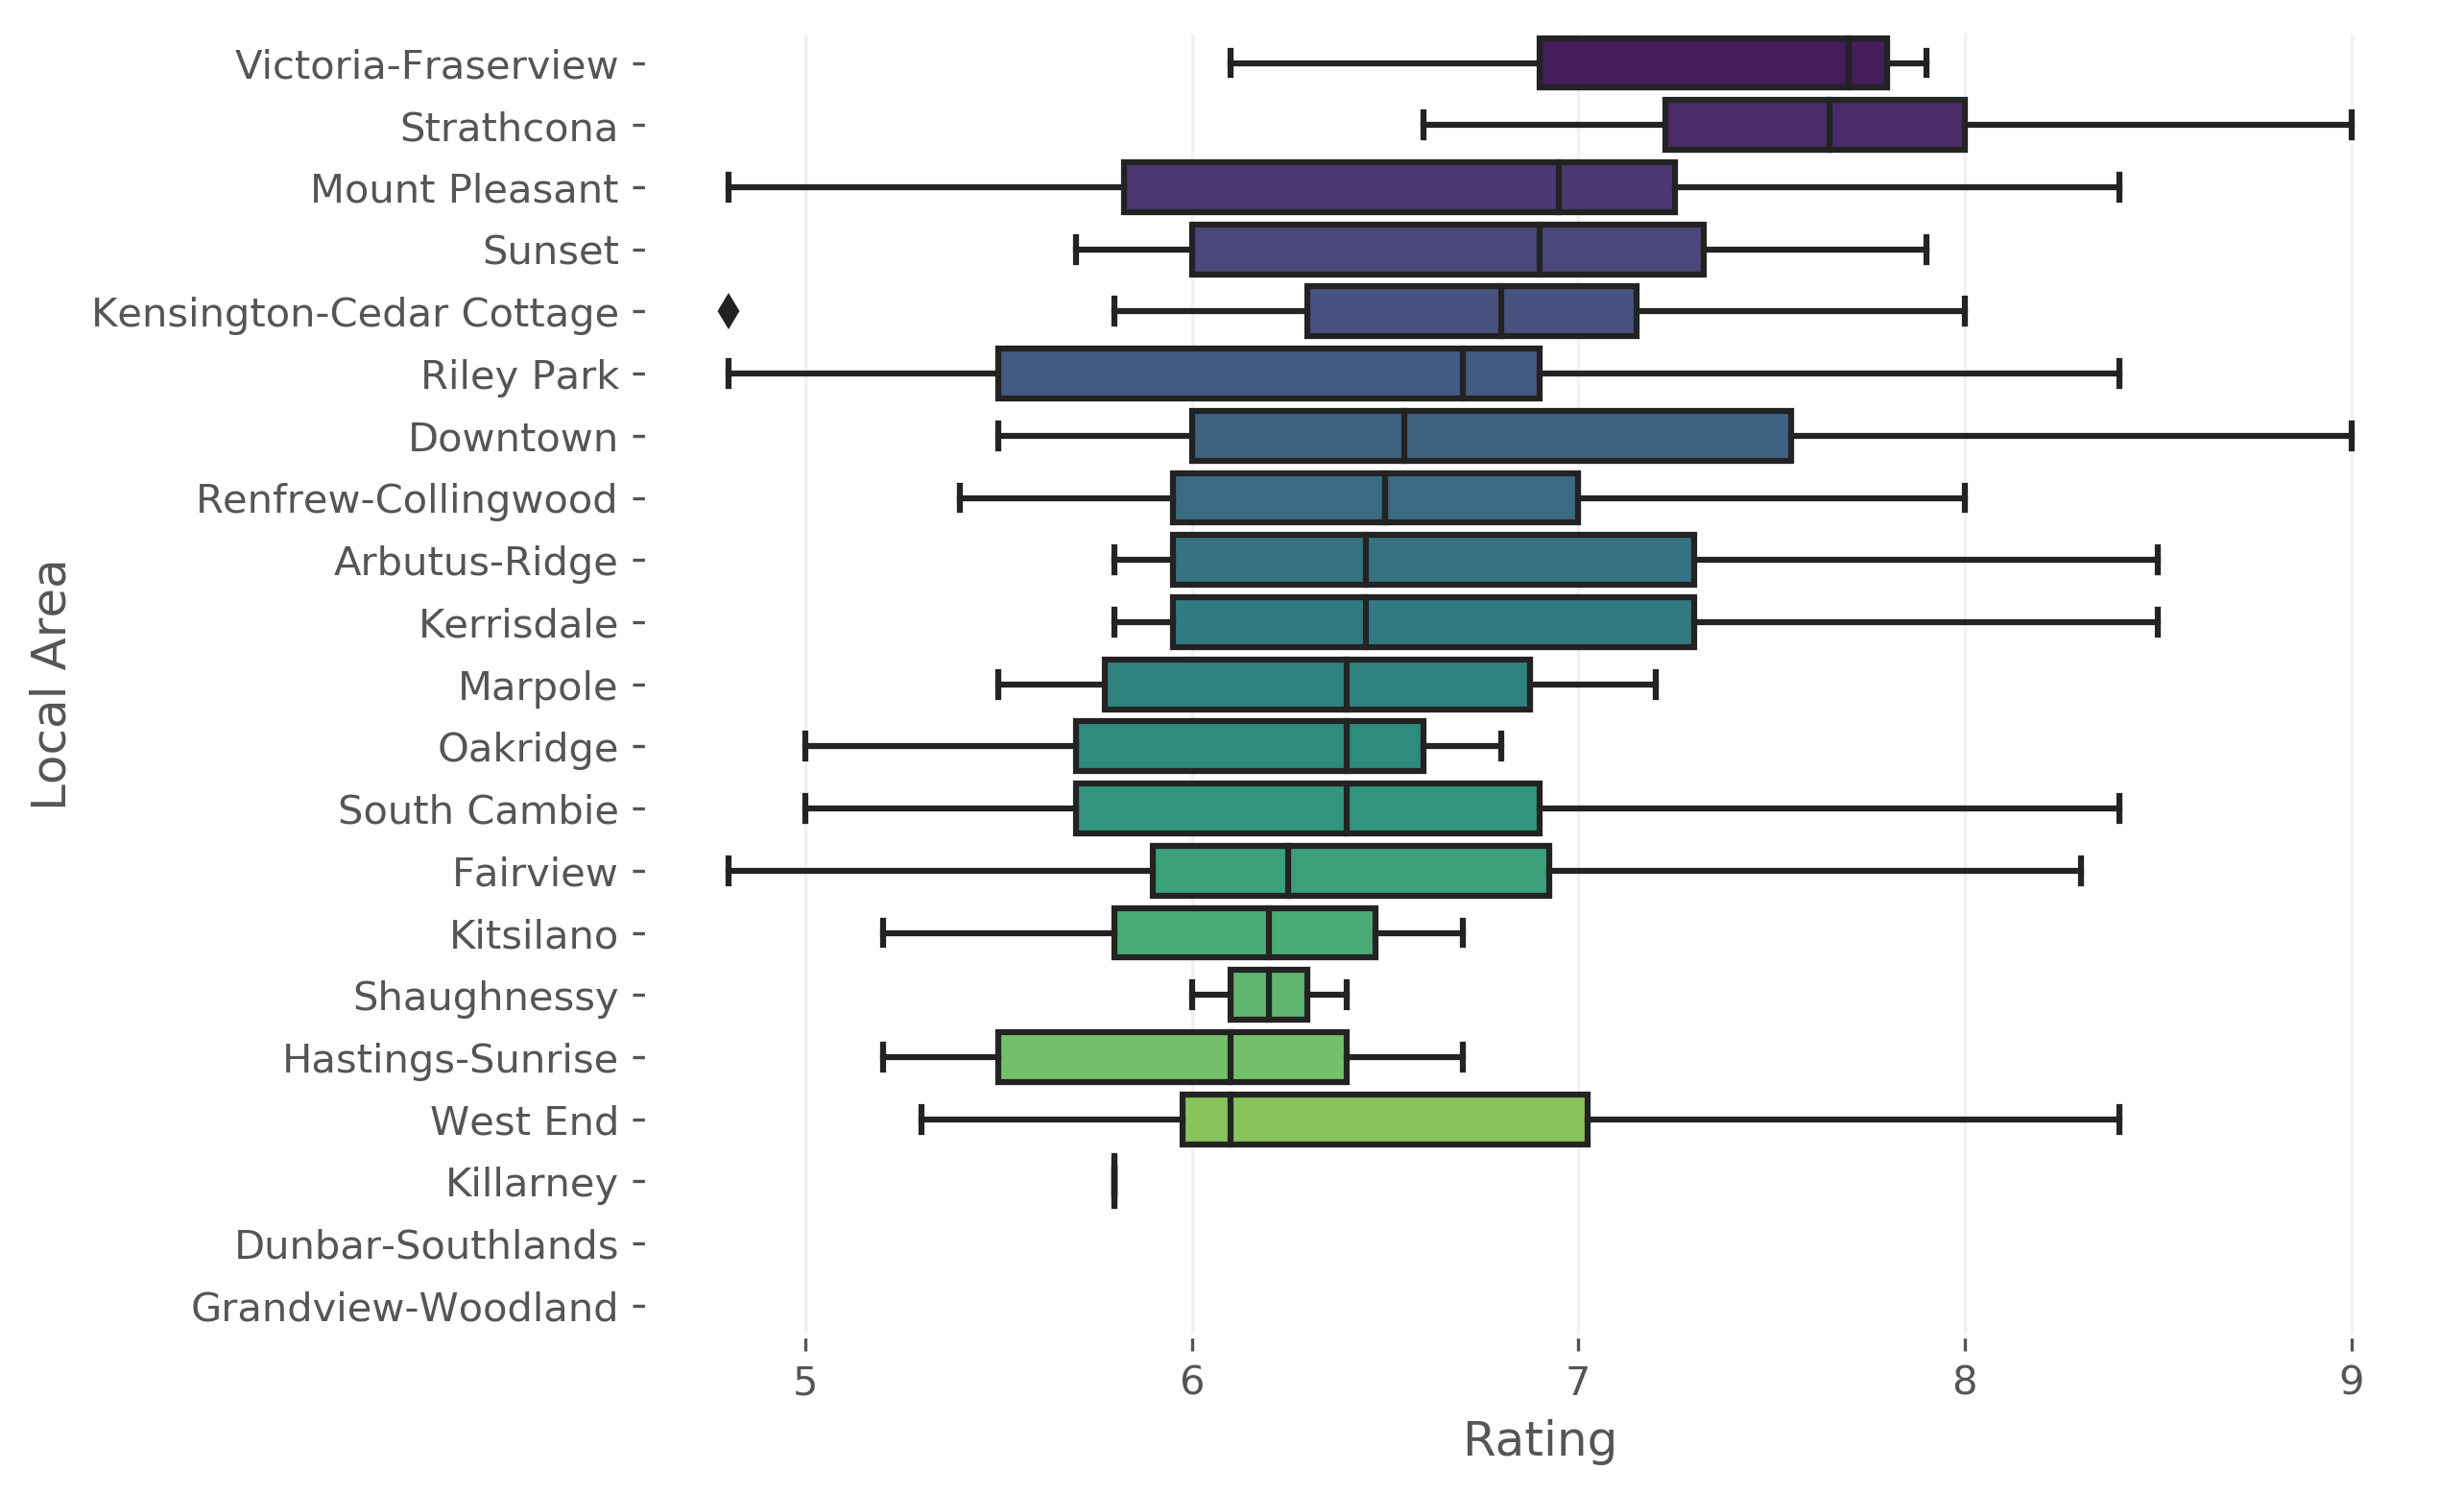

In [191]:
plt.figure(figsize=(8,6), dpi=300)
plt.rcParams['axes.facecolor']='white'
plt.grid(None,axis='y')
plt.rcParams['grid.color']='#f1f1f1'
# grouped boxplot
sns.boxplot(x='Rating', y='Local Area', data=van_cr, palette="viridis", order=ordered_mrating['Local Area'])

In [190]:
# order neighborhood by number of ratings 
num_rating = van_cr[['Local Area','Rating']].groupby('Local Area').count()
num_rating = num_rating.reset_index()
ordered_nr = num_rating.sort_values(by='Rating', ascending=False)
ordered_nr['Local Area']

1                     Downtown
20                    West End
3                     Fairview
6     Kensington-Cedar Cottage
11              Mount Pleasant
13         Renfrew-Collingwood
14                  Riley Park
16                South Cambie
18                      Sunset
17                  Strathcona
10                     Marpole
5             Hastings-Sunrise
9                    Kitsilano
7                   Kerrisdale
0                Arbutus-Ridge
12                    Oakridge
19         Victoria-Fraserview
15                 Shaughnessy
8                    Killarney
4           Grandview-Woodland
2            Dunbar-Southlands
Name: Local Area, dtype: object

In [174]:
num_rating

,Local Area,Rating
0,Arbutus-Ridge,4
1,Downtown,30
2,Dunbar-Southlands,0
3,Fairview,20
4,Grandview-Woodland,0
5,Hastings-Sunrise,5
6,Kensington-Cedar Cottage,19
7,Kerrisdale,4
8,Killarney,1
9,Kitsilano,4


In [175]:
import numpy as np

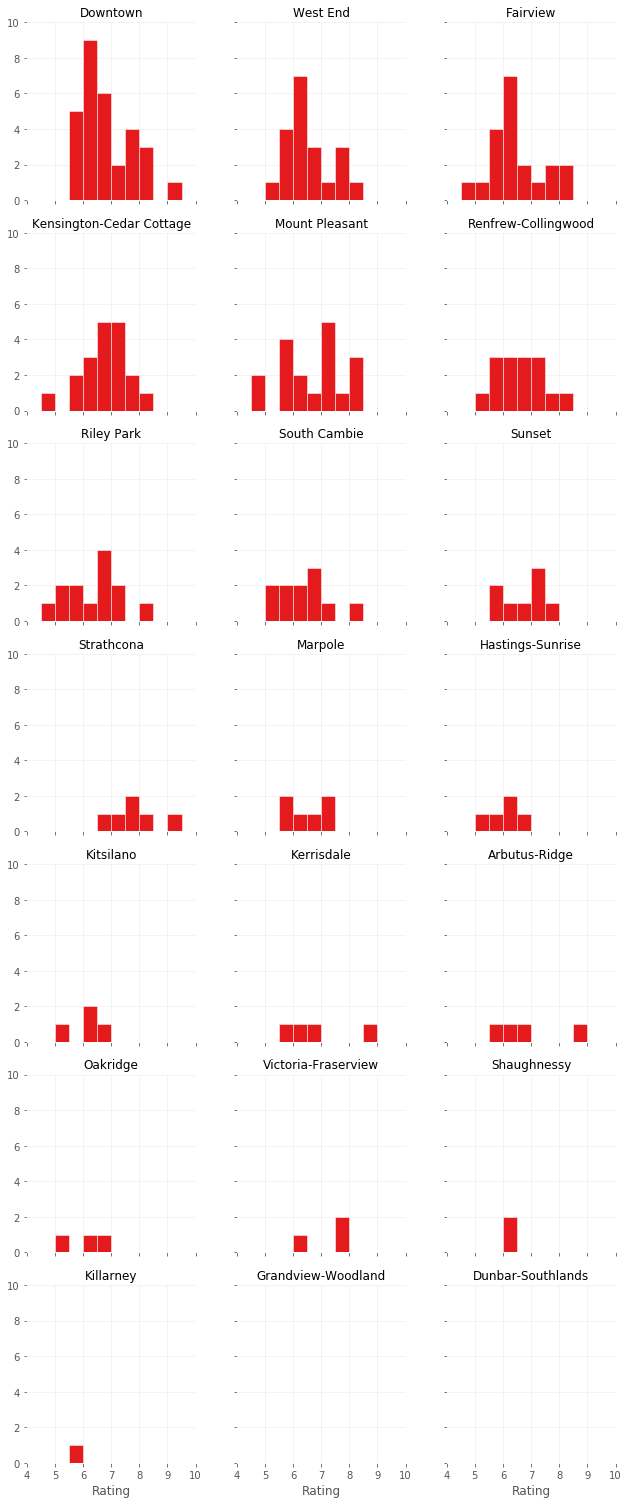

In [192]:
# histogram of rating
h = sns.FacetGrid(van_cr, col='Local Area',col_wrap=3, xlim=(4,10), ylim=(0,10), col_order=ordered_nr['Local Area'])
h = h.set(xticks=np.arange(4,11,1))
h = h.map(plt.hist, 'Rating', color='#E41A1C',bins=np.arange(4, 11,0.5), edgecolor="white")
h = h.set_axis_labels('Rating', '')
h = h.set_titles('{col_name}')

In [478]:
np.arange(4, 10, 1)

array([4, 5, 6, 7, 8, 9])

In [195]:
import math

In [196]:
cleaned_neighborhood

,Local Area,Latitude,Longitude,Area,Chinese,Density_Chinese
0,Sunset,49.218755,-123.092038,6.575731,8180,1243.968169
1,Mount Pleasant,49.263065,-123.098513,3.720549,3580,962.223642
2,Riley Park,49.244766,-123.103147,4.931676,5210,1056.435881
3,Downtown,49.280747,-123.116567,4.674227,9490,2030.282296
4,Kitsilano,49.267540,-123.163295,6.362855,3615,568.141185
5,Dunbar-Southlands,49.237960,-123.189548,9.079848,6525,718.624330
6,Kerrisdale,49.223655,-123.159576,6.608907,6445,975.199019
7,Arbutus-Ridge,49.246804,-123.161669,3.700620,6970,1883.467974
8,West Point Grey,49.268401,-123.203467,5.300219,3100,584.881449
9,Marpole,49.210208,-123.128382,6.003074,10585,1763.263213


In [197]:
# get density of Chinese restaurants
density_cr = van_cr.groupby('Local Area').count()/(math.pi*1500**2/10**6)
density_cr = density_cr[['Venue']].reset_index()
density_cr.rename(columns={'Venue':'Density_CR'}, inplace=True)
summary = cleaned_neighborhood.merge(density_cr, how='outer', on='Local Area')
summary.fillna(0,inplace=True)

In [198]:
summary = summary.merge(med_rating, how='outer', on='Local Area')
summary

,Local Area,Latitude,Longitude,Area,Chinese,Density_Chinese,Density_CR,Rating
0,Sunset,49.218755,-123.092038,6.575731,8180,1243.968169,2.829421,6.90
1,Mount Pleasant,49.263065,-123.098513,3.720549,3580,962.223642,5.517371,6.95
2,Riley Park,49.244766,-123.103147,4.931676,5210,1056.435881,4.951487,6.70
3,Downtown,49.280747,-123.116567,4.674227,9490,2030.282296,7.073553,6.55
4,Kitsilano,49.267540,-123.163295,6.362855,3615,568.141185,2.546479,6.20
5,Dunbar-Southlands,49.237960,-123.189548,9.079848,6525,718.624330,0.424413,NaN
6,Kerrisdale,49.223655,-123.159576,6.608907,6445,975.199019,1.980595,6.45
7,Arbutus-Ridge,49.246804,-123.161669,3.700620,6970,1883.467974,2.405008,6.45
8,West Point Grey,49.268401,-123.203467,5.300219,3100,584.881449,0.000000,NaN
9,Marpole,49.210208,-123.128382,6.003074,10585,1763.263213,2.829421,6.40


In [212]:
import matplotlib.pyplot as plt

In [209]:
plt.style.use('ggplot')

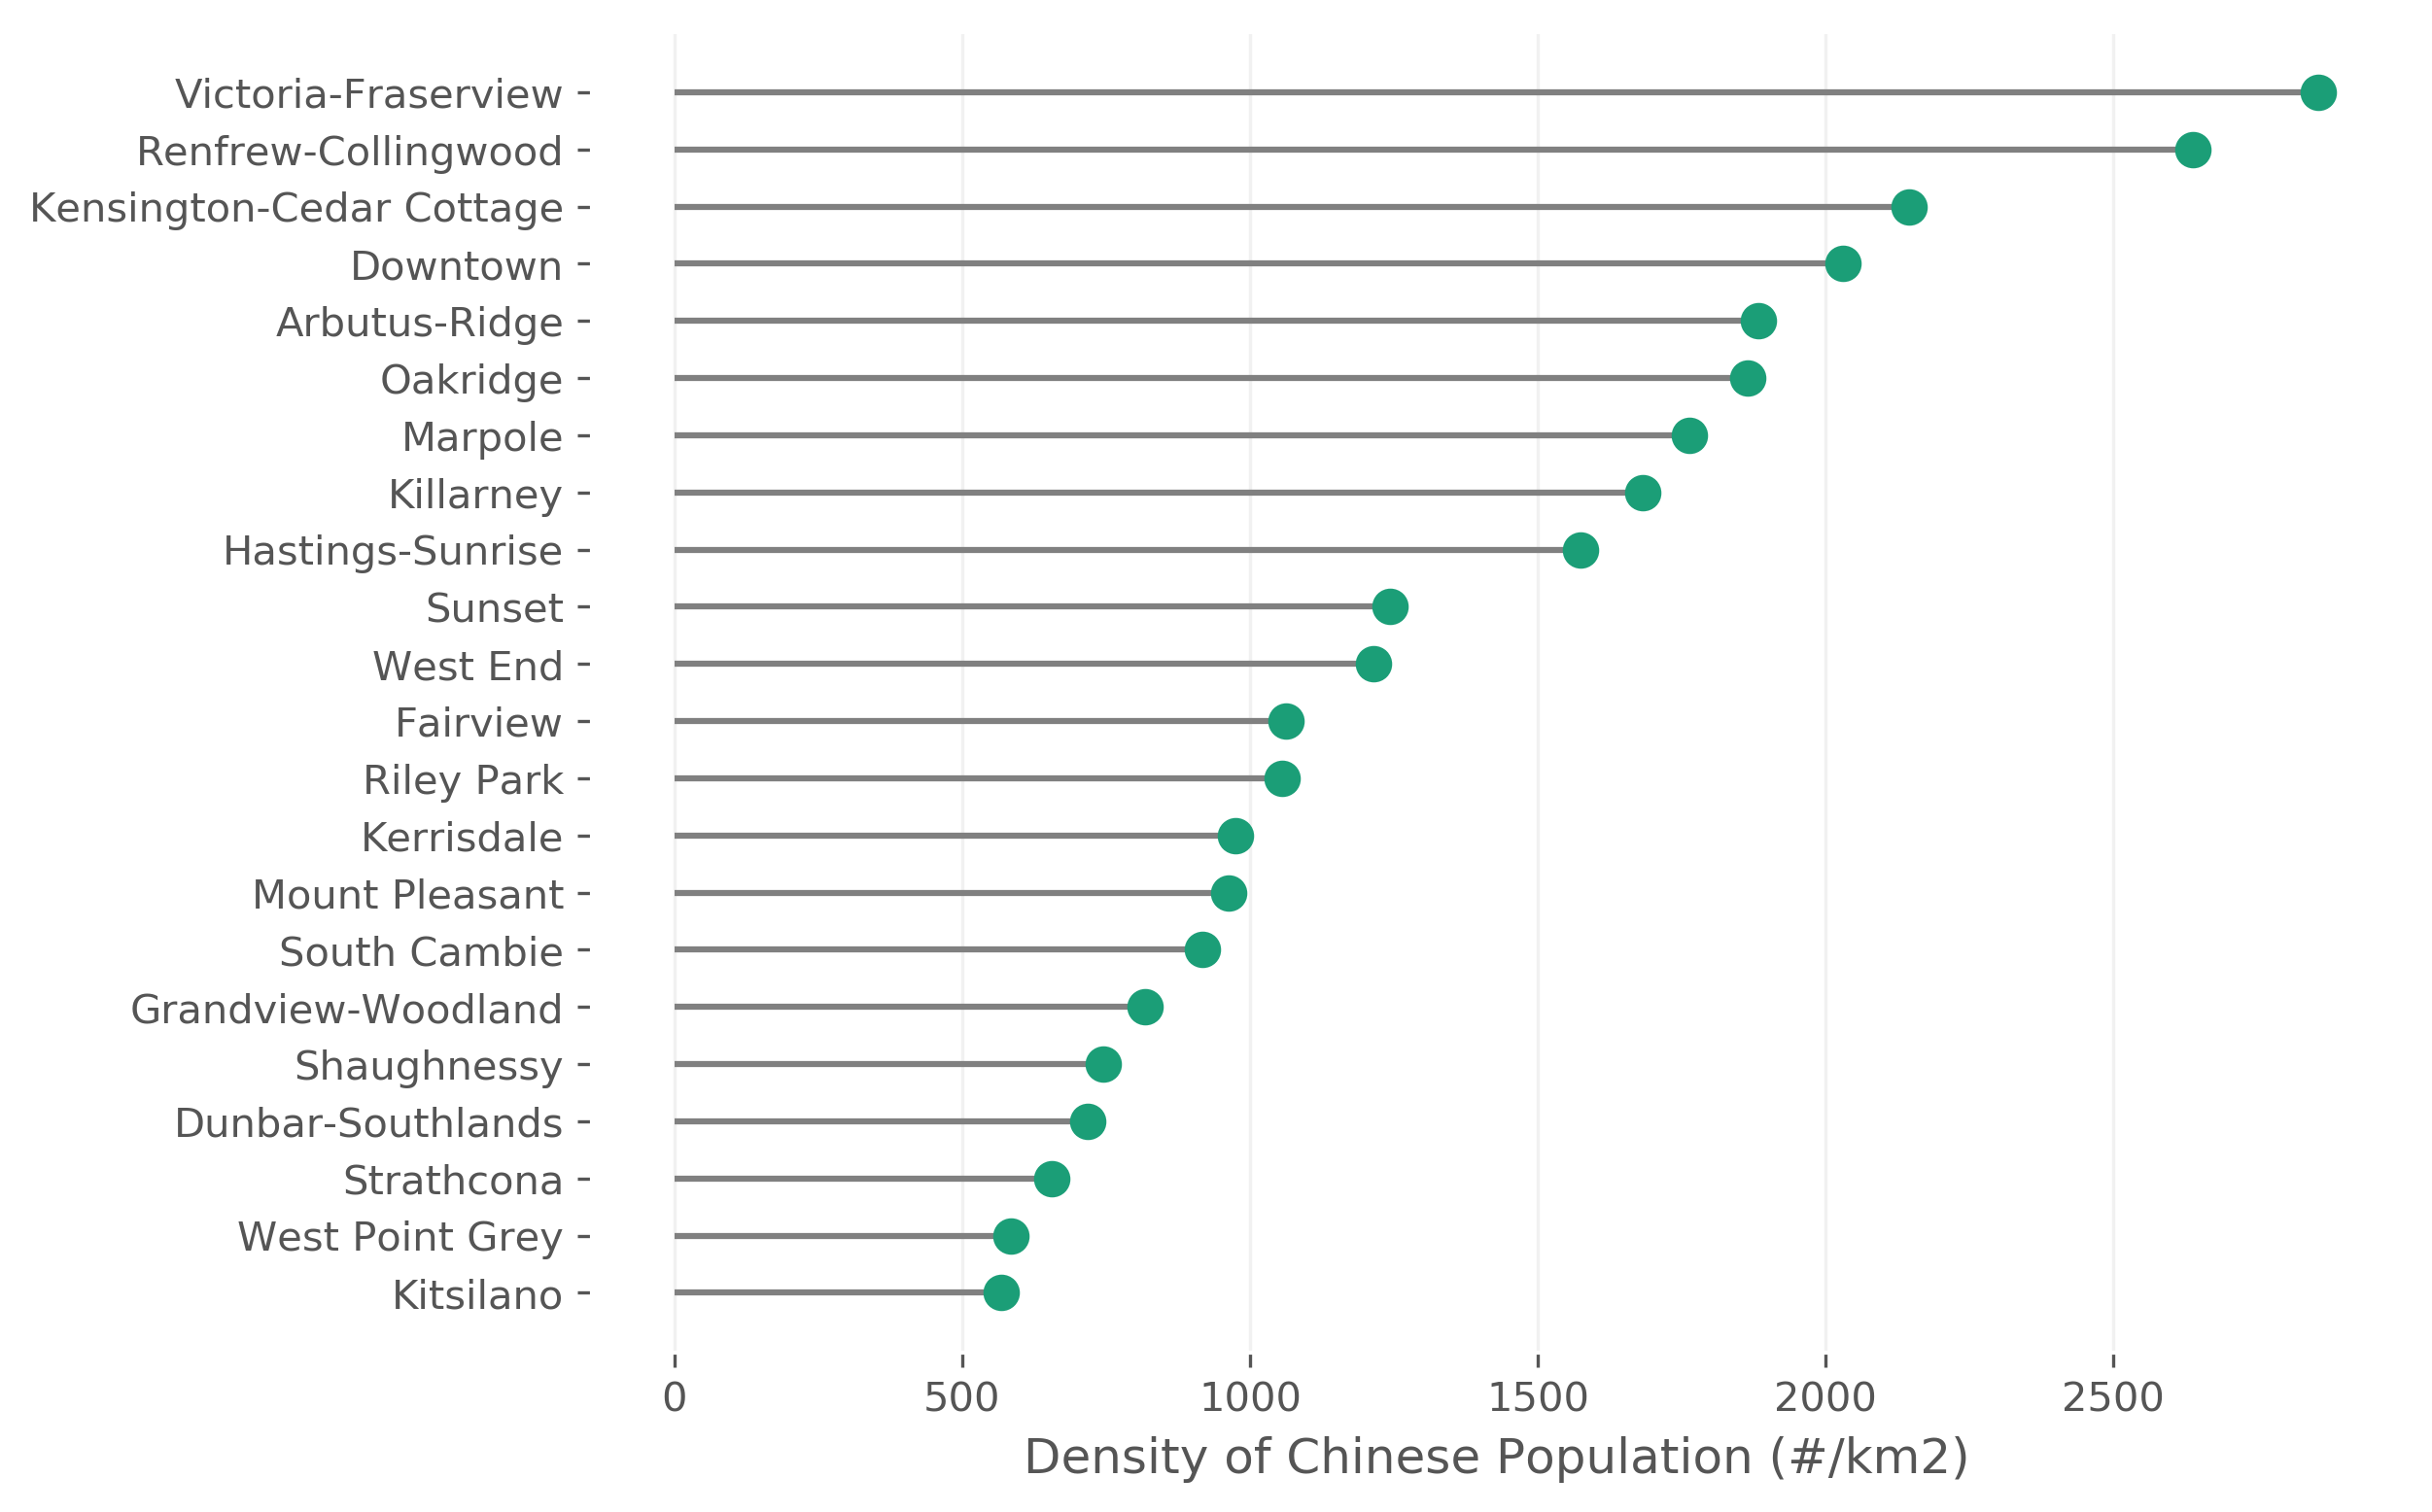

In [213]:
# plot density of Chinese population
plt.figure(figsize=(8,6),dpi=300)
plt.rcParams['axes.facecolor']='white'
# reorder density of Chinese population
ordered_summary = summary.sort_values(by='Density_Chinese')
my_range=range(1,len(summary.index)+1)
# lollipop
plt.hlines(y=my_range, xmin=0, xmax=ordered_summary['Density_Chinese'], color='grey')
plt.plot(ordered_summary['Density_Chinese'], my_range, 'o', color="#1B9E77", markersize=8)
plt.grid(None,axis='y')
plt.rcParams['grid.color']='#f1f1f1'

# Add titles and axis names
plt.yticks(my_range, ordered_summary['Local Area'])
plt.xlabel('Density of Chinese Population (#/km2)')

plt.show()

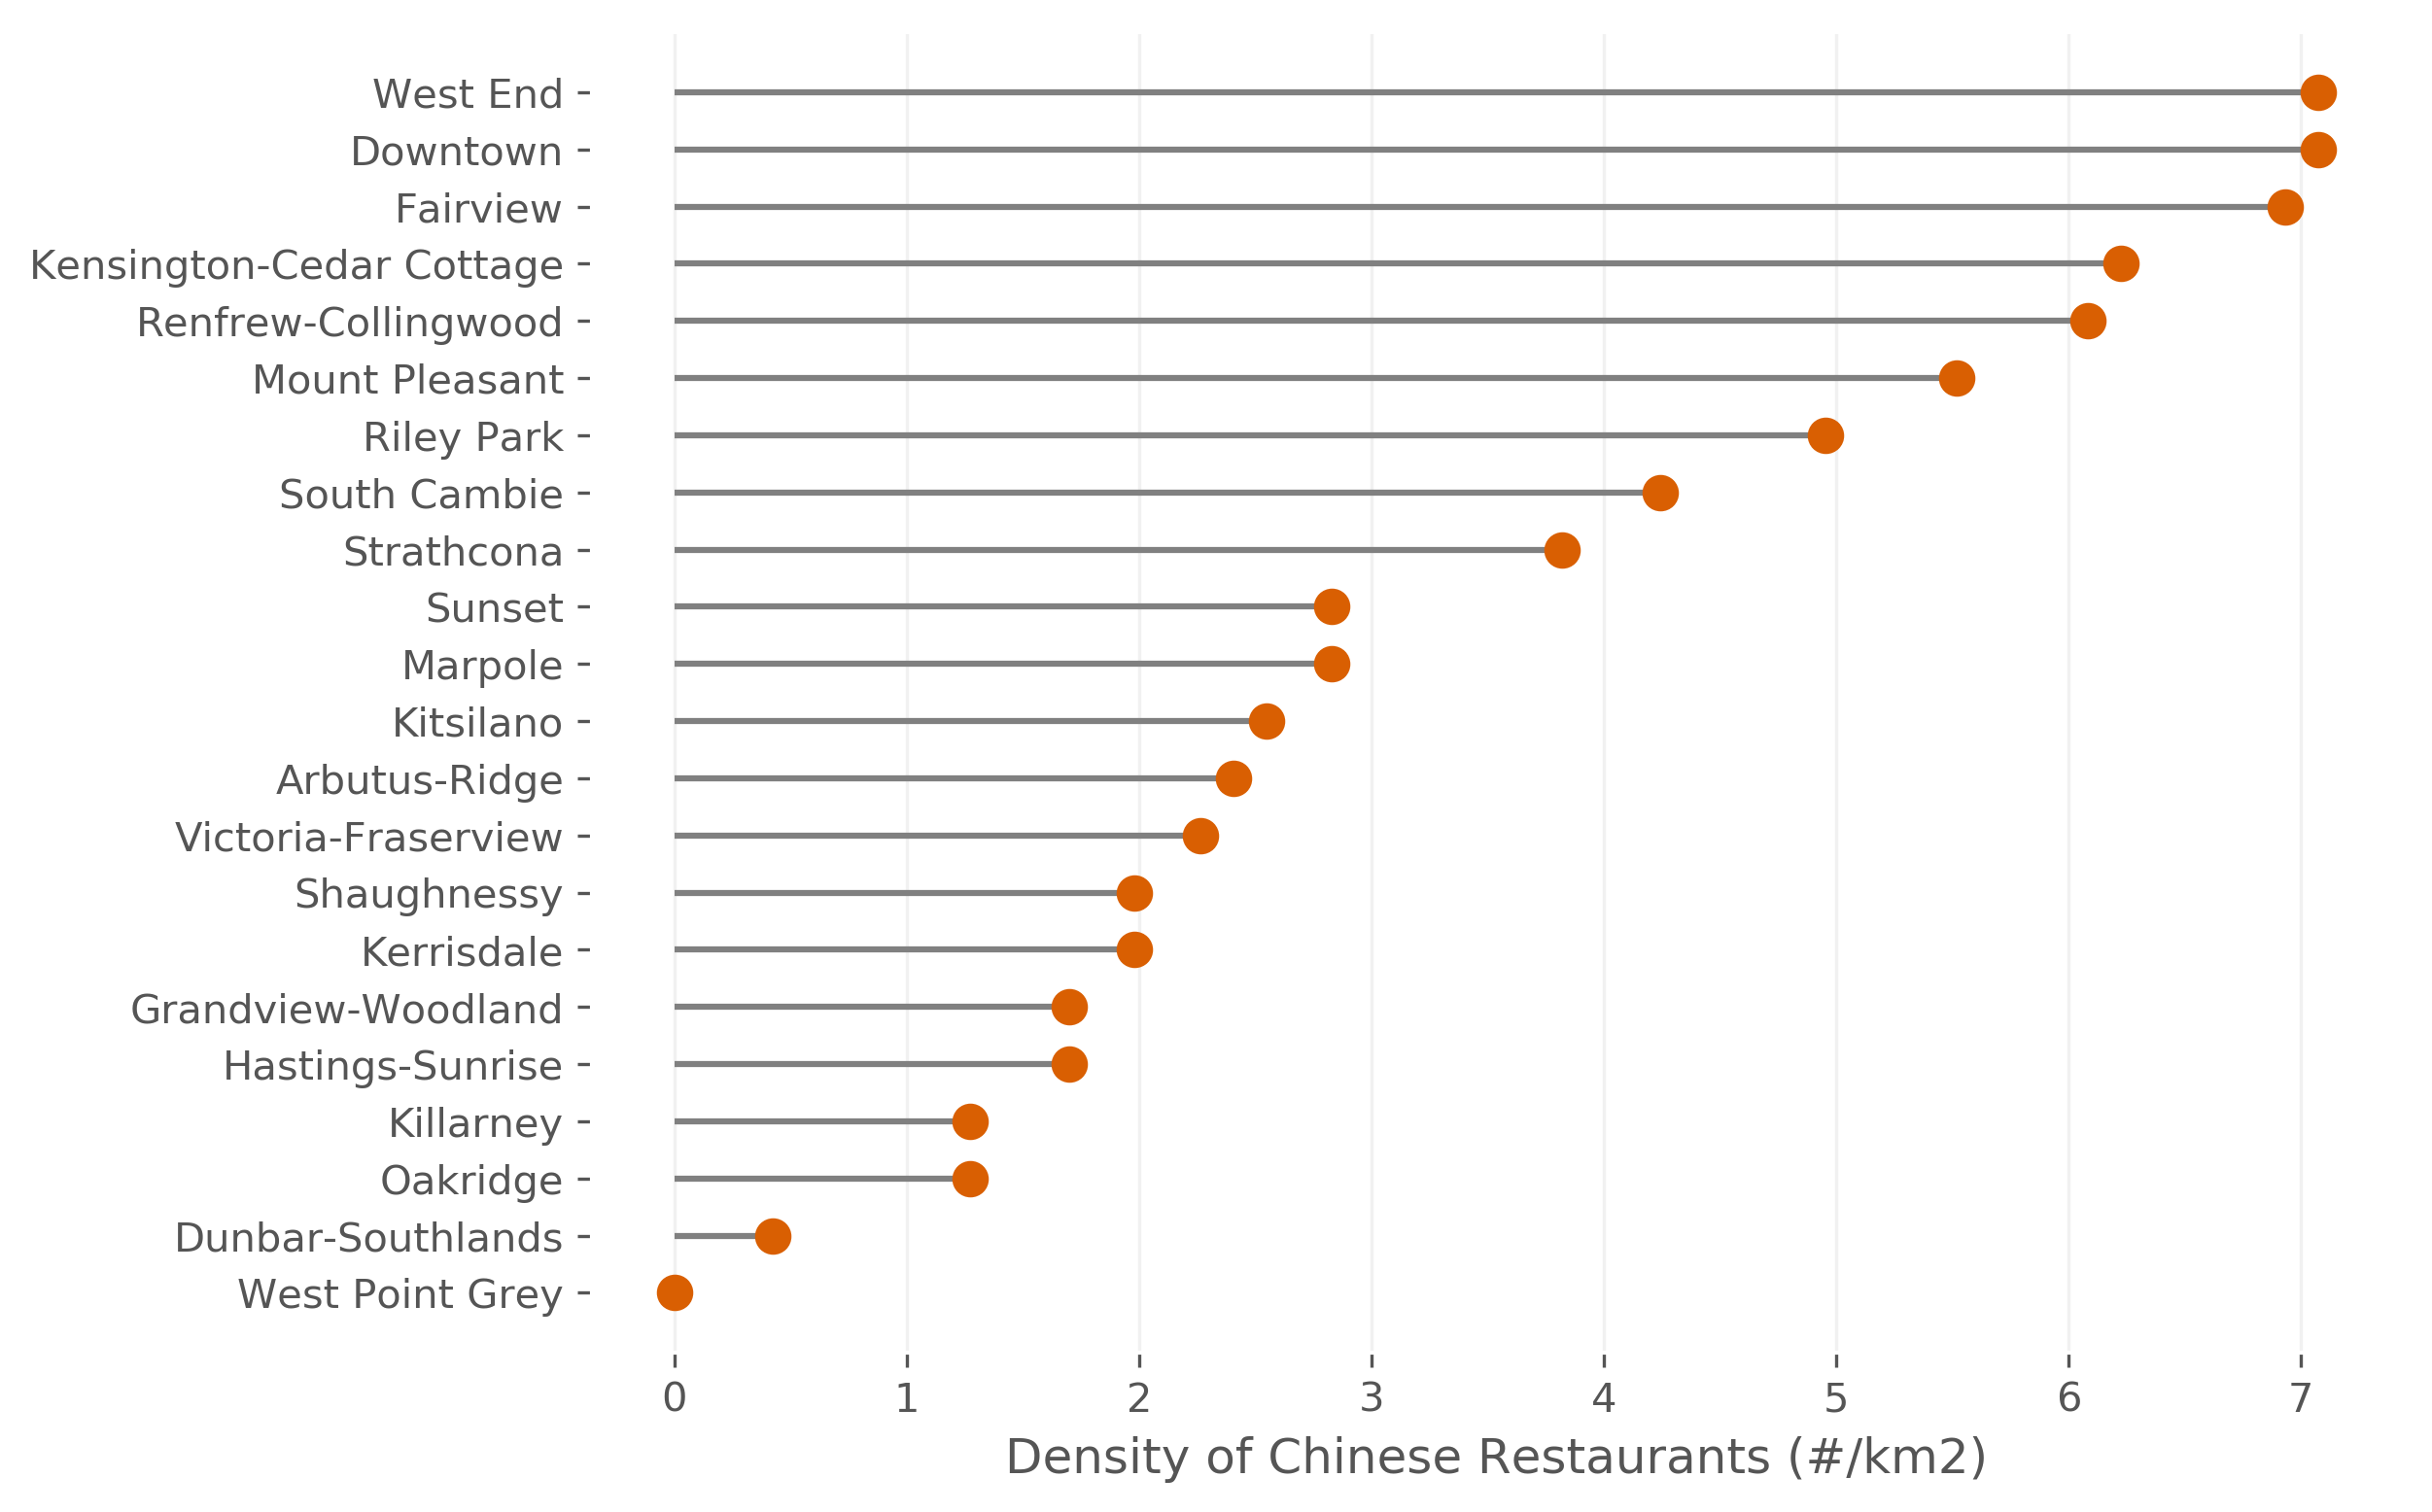

In [211]:
# plot density of Chinese population
plt.figure(figsize=(8,6),dpi=300)

plt.rcParams['axes.facecolor']='white'
# reorder density of Chinese population
ordered_summary = summary.sort_values(by='Density_CR')
my_range=range(1,len(summary.index)+1)
plt.hlines(y=my_range, xmin=0, xmax=ordered_summary['Density_CR'], color='grey')
plt.plot(ordered_summary['Density_CR'], my_range, 'o', color='#D95F02', markersize=8)
plt.grid(None,axis='y')

# Add titles and axis names
plt.yticks(my_range, ordered_summary['Local Area'])
plt.xlabel('Density of Chinese Restaurants (#/km2)')

plt.show()

### Cluster Analysis

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN

In [243]:
summary[['Density_Chinese','Density_CR']]

,Density_Chinese,Density_CR
0,1243.968169,2.829421
1,962.223642,5.375900
2,1056.435881,4.810016
3,2030.282296,7.073553
4,568.141185,2.546479
5,718.624330,0.424413
6,975.199019,1.980595
7,1883.467974,2.405008
8,584.881449,0.000000
9,1763.263213,2.829421


In [246]:
data = summary[['Density_Chinese', 'Density_CR']]
scaler = MinMaxScaler()
scaler.fit(data)
normalized_data = scaler.transform(data)
normalized_data

array([[0.29538578, 0.4       ],
       [0.17224284, 0.76      ],
       [0.21342047, 0.68      ],
       [0.63906253, 1.        ],
       [0.        , 0.36      ],
       [0.06577213, 0.06      ],
       [0.17791402, 0.28      ],
       [0.57489394, 0.34      ],
       [0.00731672, 0.        ],
       [0.52235567, 0.4       ],
       [0.56692854, 0.18      ],
       [0.07751358, 0.28      ],
       [0.21636302, 0.98      ],
       [0.15233298, 0.58      ],
       [0.28246948, 0.98      ],
       [0.4872809 , 0.18      ],
       [0.90474463, 0.86      ],
       [0.43989639, 0.24      ],
       [1.        , 0.32      ],
       [0.68940682, 0.88      ],
       [0.03824176, 0.54      ],
       [0.10884964, 0.24      ]])

In [690]:
normalized_data[0][0]

0.29538578473347765

In [696]:
from adjustText import adjust_text

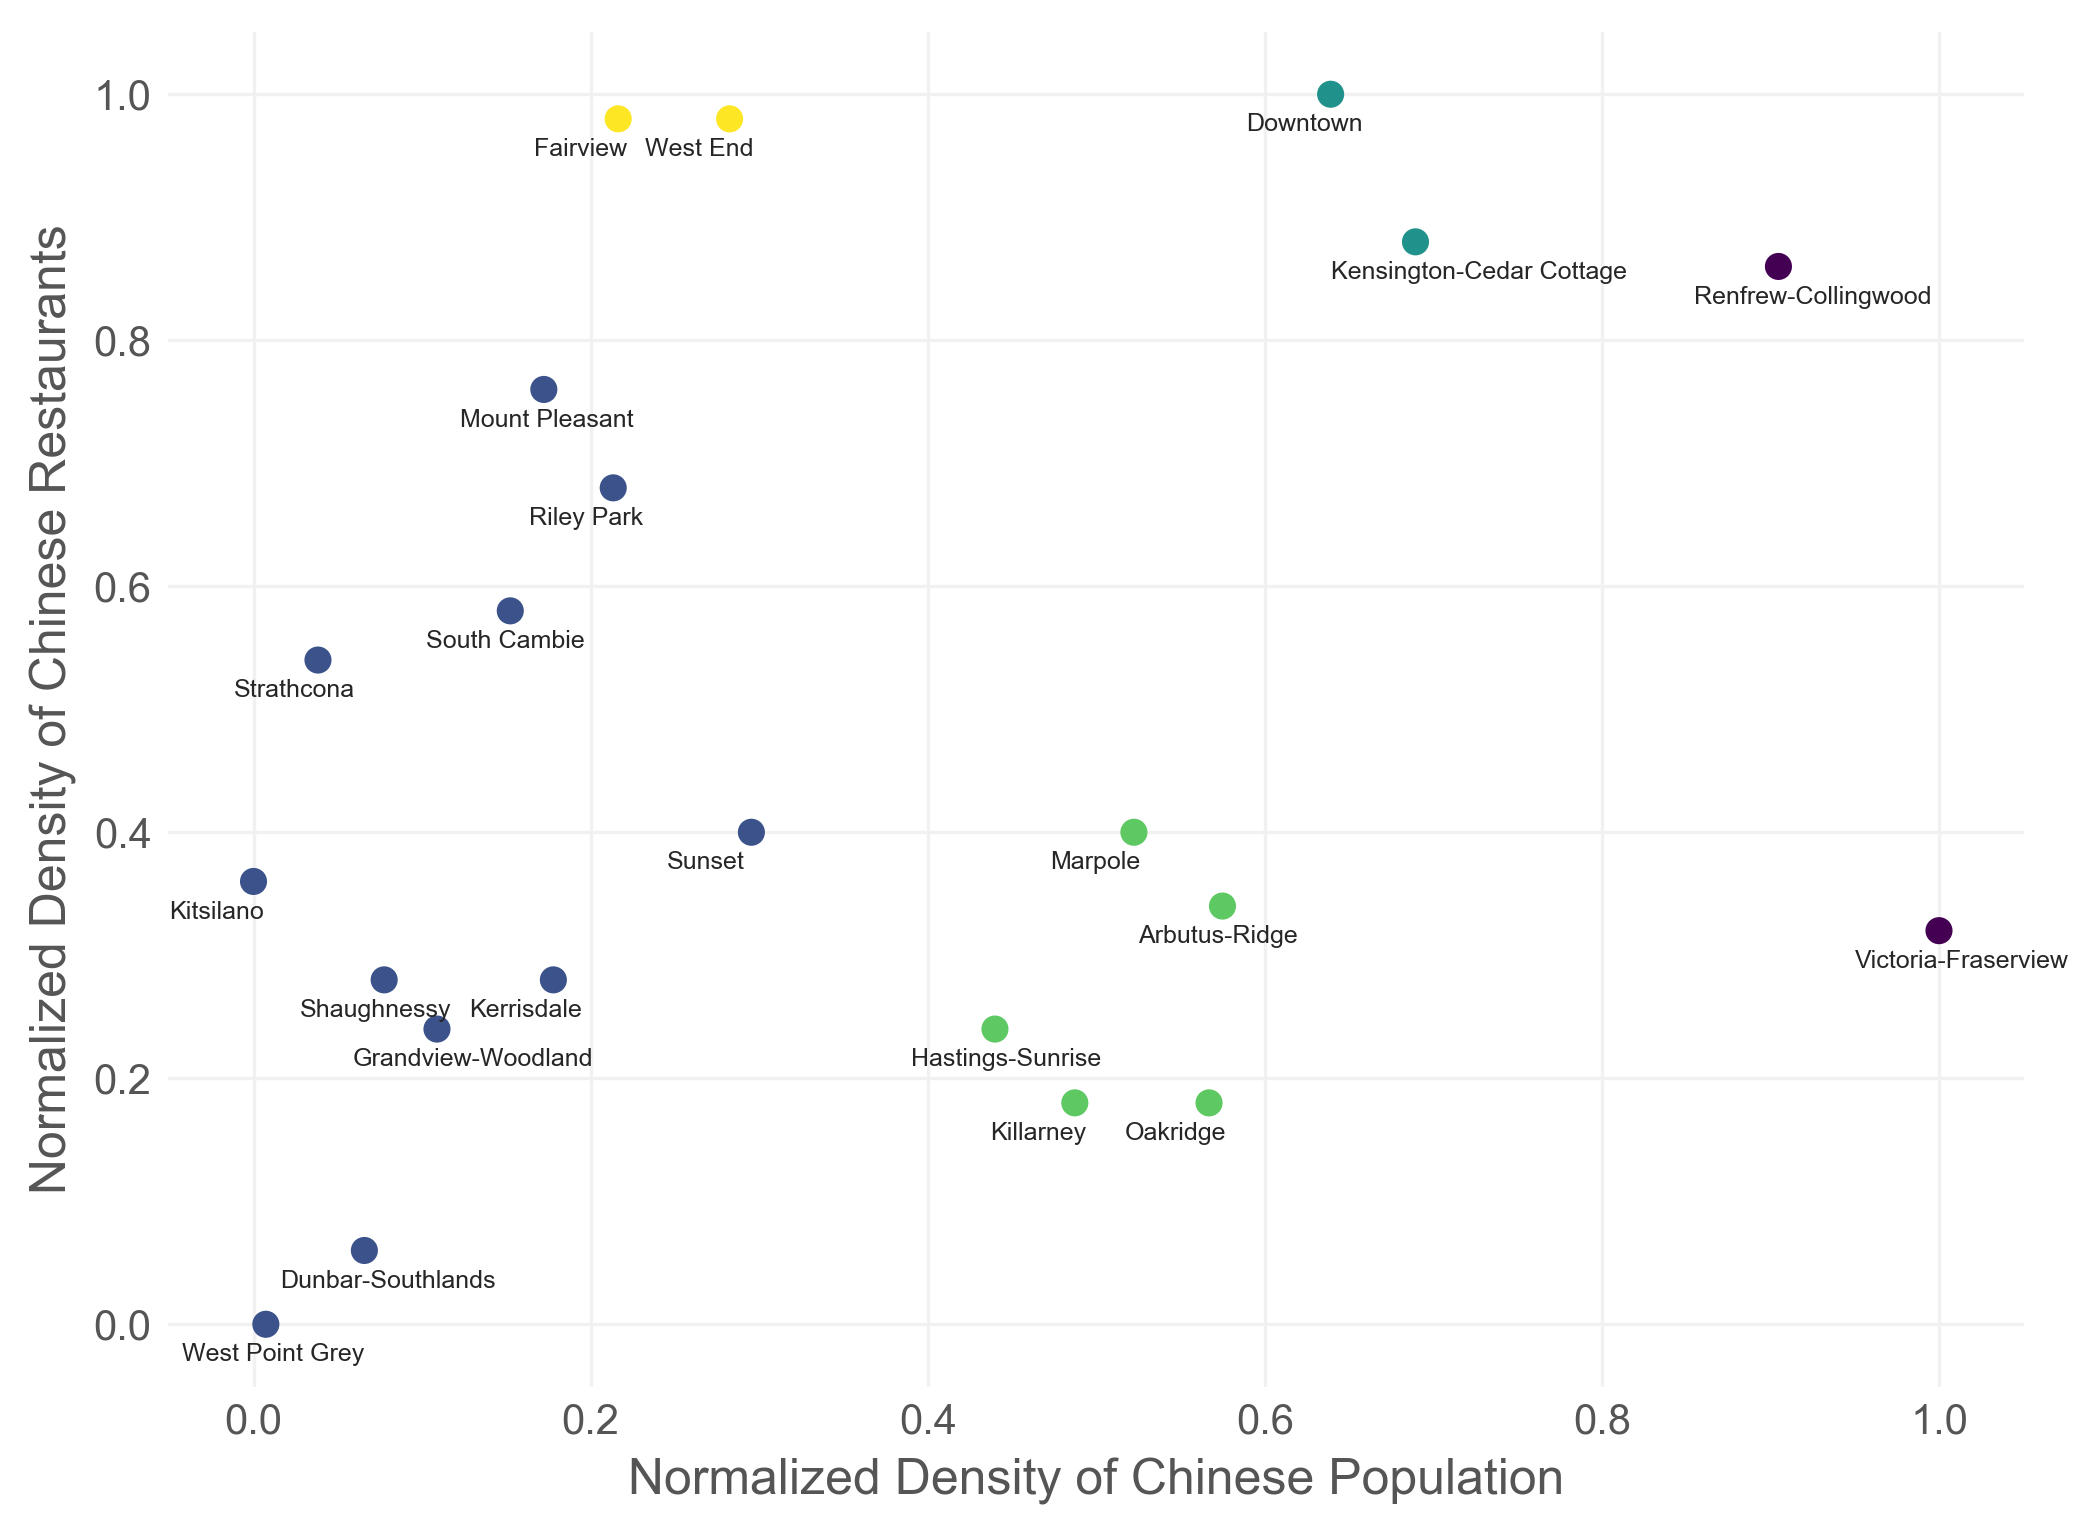

In [703]:
dbscan = DBSCAN(eps=0.20, min_samples = 2)
clusters = dbscan.fit_predict(normalized_data)

plt.figure(figsize=(8,6),dpi=300)
# simulating a pandas df['type'] column
types = summary['Neighborhood']

for i,type in enumerate(types):
    x = normalized_data[i][0]
    y = normalized_data[i][1]
    plt.text(x-0.05, y-0.03, type, fontsize=6)

# plot the cluster assignments
plt.scatter(normalized_data[:, 0], normalized_data[:, 1], c=clusters, cmap="viridis")
plt.xlabel("Normalized Density of Chinese Population")
plt.ylabel("Normalized Density of Chinese Restaurants")

plt.show()

In [624]:
van_cr

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category,Venue Rating
0,Sunset,49.218755,-123.092038,Yu Xiang Yuan,5158fe65e4b06ee01ae984c9,49.224628,-123.090869,Chinese Restaurant,6.1
1,Sunset,49.218755,-123.092038,Shoom 雅菀食府,55039916498ee7519a7e1bf9,49.224861,-123.090948,Cantonese Restaurant,7.3
2,Sunset,49.218755,-123.092038,Deer Garden Signatures,5075d46ee4b0c63048e3740e,49.227635,-123.090703,Chinese Restaurant,7.9
3,Sunset,49.218755,-123.092038,Lian Hong Chinese Food & Bakery,4dc6caa9d4c0ad9c0fa94bd3,49.226530,-123.090620,Dim Sum Restaurant,NaN
4,Sunset,49.218755,-123.092038,Neptune Chinese Kitchen,5b6659bb5a2c91002c139a9a,49.210604,-123.092673,Cantonese Restaurant,NaN
5,Sunset,49.218755,-123.092038,Good Choice Restaurant,4cb22811db32f04d1500ce4d,49.230055,-123.090826,Chinese Restaurant,6.5
6,Sunset,49.218755,-123.092038,Angel Cafe 君怡餐廳,56188f36498ef927d657b7bc,49.230207,-123.090850,Cantonese Restaurant,NaN
7,Sunset,49.218755,-123.092038,Sun Yard Chinese Restaurant,4f00db0029c201c6fe489b8f,49.227547,-123.090498,Chinese Restaurant,NaN
8,Sunset,49.218755,-123.092038,冠樂,4e5709ad7d8b7535133aa568,49.227786,-123.090359,Chinese Restaurant,NaN
9,Sunset,49.218755,-123.092038,Taste Good Wonton Seafood Restaurant,4be773c4c5220f471db9a8ca,49.210635,-123.092571,Chinese Restaurant,5.7


In [626]:
van_cr.loc[van_cr['Neighborhood']=='Victoria-Fraserview', ['Venue Category','Venue Rating']].reset_index()

,index,Venue Category,Venue Rating
0,18,Chinese Restaurant,NaN
1,19,Chinese Restaurant,NaN
2,22,Chinese Restaurant,NaN
3,23,Chinese Restaurant,NaN
4,985,Chinese Restaurant,NaN
5,986,Chinese Restaurant,NaN
6,987,Chinese Restaurant,7.7
7,988,Chinese Restaurant,NaN
8,989,Chinese Restaurant,NaN
9,990,Chinese Restaurant,NaN


In [598]:
clusters

array([ 0,  0,  0,  1,  0,  0,  0,  2,  0,  2,  2,  0,  3,  0,  3,  2, -1,
        2, -1,  1,  0,  0])

In [599]:
summary['Cluster']=clusters

In [600]:
summary

,Neighborhood,Latitude,Longitude,Area,Chinese,Density_Chinese,Density_CR,Venue Rating,Cluster
0,Sunset,49.218755,-123.092038,6.575731,8180,1243.968169,3.678248,7.30,0
1,Mount Pleasant,49.263065,-123.098513,3.720549,3580,962.223642,13.439751,6.65,0
2,Riley Park,49.244766,-123.103147,4.931676,5210,1056.435881,12.732395,6.50,0
3,Downtown,49.280747,-123.116567,4.674227,9490,2030.282296,15.703288,6.30,1
4,Kitsilano,49.267540,-123.163295,6.362855,3615,568.141185,5.092958,6.20,0
5,Dunbar-Southlands,49.237960,-123.189548,9.079848,6525,718.624330,0.707355,NaN,0
6,Kerrisdale,49.223655,-123.159576,6.608907,6445,975.199019,3.961190,6.45,0
7,Arbutus-Ridge,49.246804,-123.161669,3.700620,6970,1883.467974,5.234429,6.45,2
8,West Point Grey,49.268401,-123.203467,5.300219,3100,584.881449,0.000000,NaN,0
9,Marpole,49.210208,-123.128382,6.003074,10585,1763.263213,3.112363,6.40,2


In [637]:
boxplot_rating = pd.merge(van_cr, summary[['Neighborhood', 'Cluster']], on='Neighborhood')

In [659]:
boxplot_rating

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category,Venue Rating,Cluster
0,Sunset,49.218755,-123.092038,Yu Xiang Yuan,5158fe65e4b06ee01ae984c9,49.224628,-123.090869,Chinese Restaurant,6.1,0
1,Sunset,49.218755,-123.092038,Shoom 雅菀食府,55039916498ee7519a7e1bf9,49.224861,-123.090948,Cantonese Restaurant,7.3,0
2,Sunset,49.218755,-123.092038,Deer Garden Signatures,5075d46ee4b0c63048e3740e,49.227635,-123.090703,Chinese Restaurant,7.9,0
3,Sunset,49.218755,-123.092038,Lian Hong Chinese Food & Bakery,4dc6caa9d4c0ad9c0fa94bd3,49.226530,-123.090620,Dim Sum Restaurant,NaN,0
4,Sunset,49.218755,-123.092038,Neptune Chinese Kitchen,5b6659bb5a2c91002c139a9a,49.210604,-123.092673,Cantonese Restaurant,NaN,0
5,Sunset,49.218755,-123.092038,Good Choice Restaurant,4cb22811db32f04d1500ce4d,49.230055,-123.090826,Chinese Restaurant,6.5,0
6,Sunset,49.218755,-123.092038,Angel Cafe 君怡餐廳,56188f36498ef927d657b7bc,49.230207,-123.090850,Cantonese Restaurant,NaN,0
7,Sunset,49.218755,-123.092038,Sun Yard Chinese Restaurant,4f00db0029c201c6fe489b8f,49.227547,-123.090498,Chinese Restaurant,NaN,0
8,Sunset,49.218755,-123.092038,冠樂,4e5709ad7d8b7535133aa568,49.227786,-123.090359,Chinese Restaurant,NaN,0
9,Sunset,49.218755,-123.092038,Taste Good Wonton Seafood Restaurant,4be773c4c5220f471db9a8ca,49.210635,-123.092571,Chinese Restaurant,5.7,0


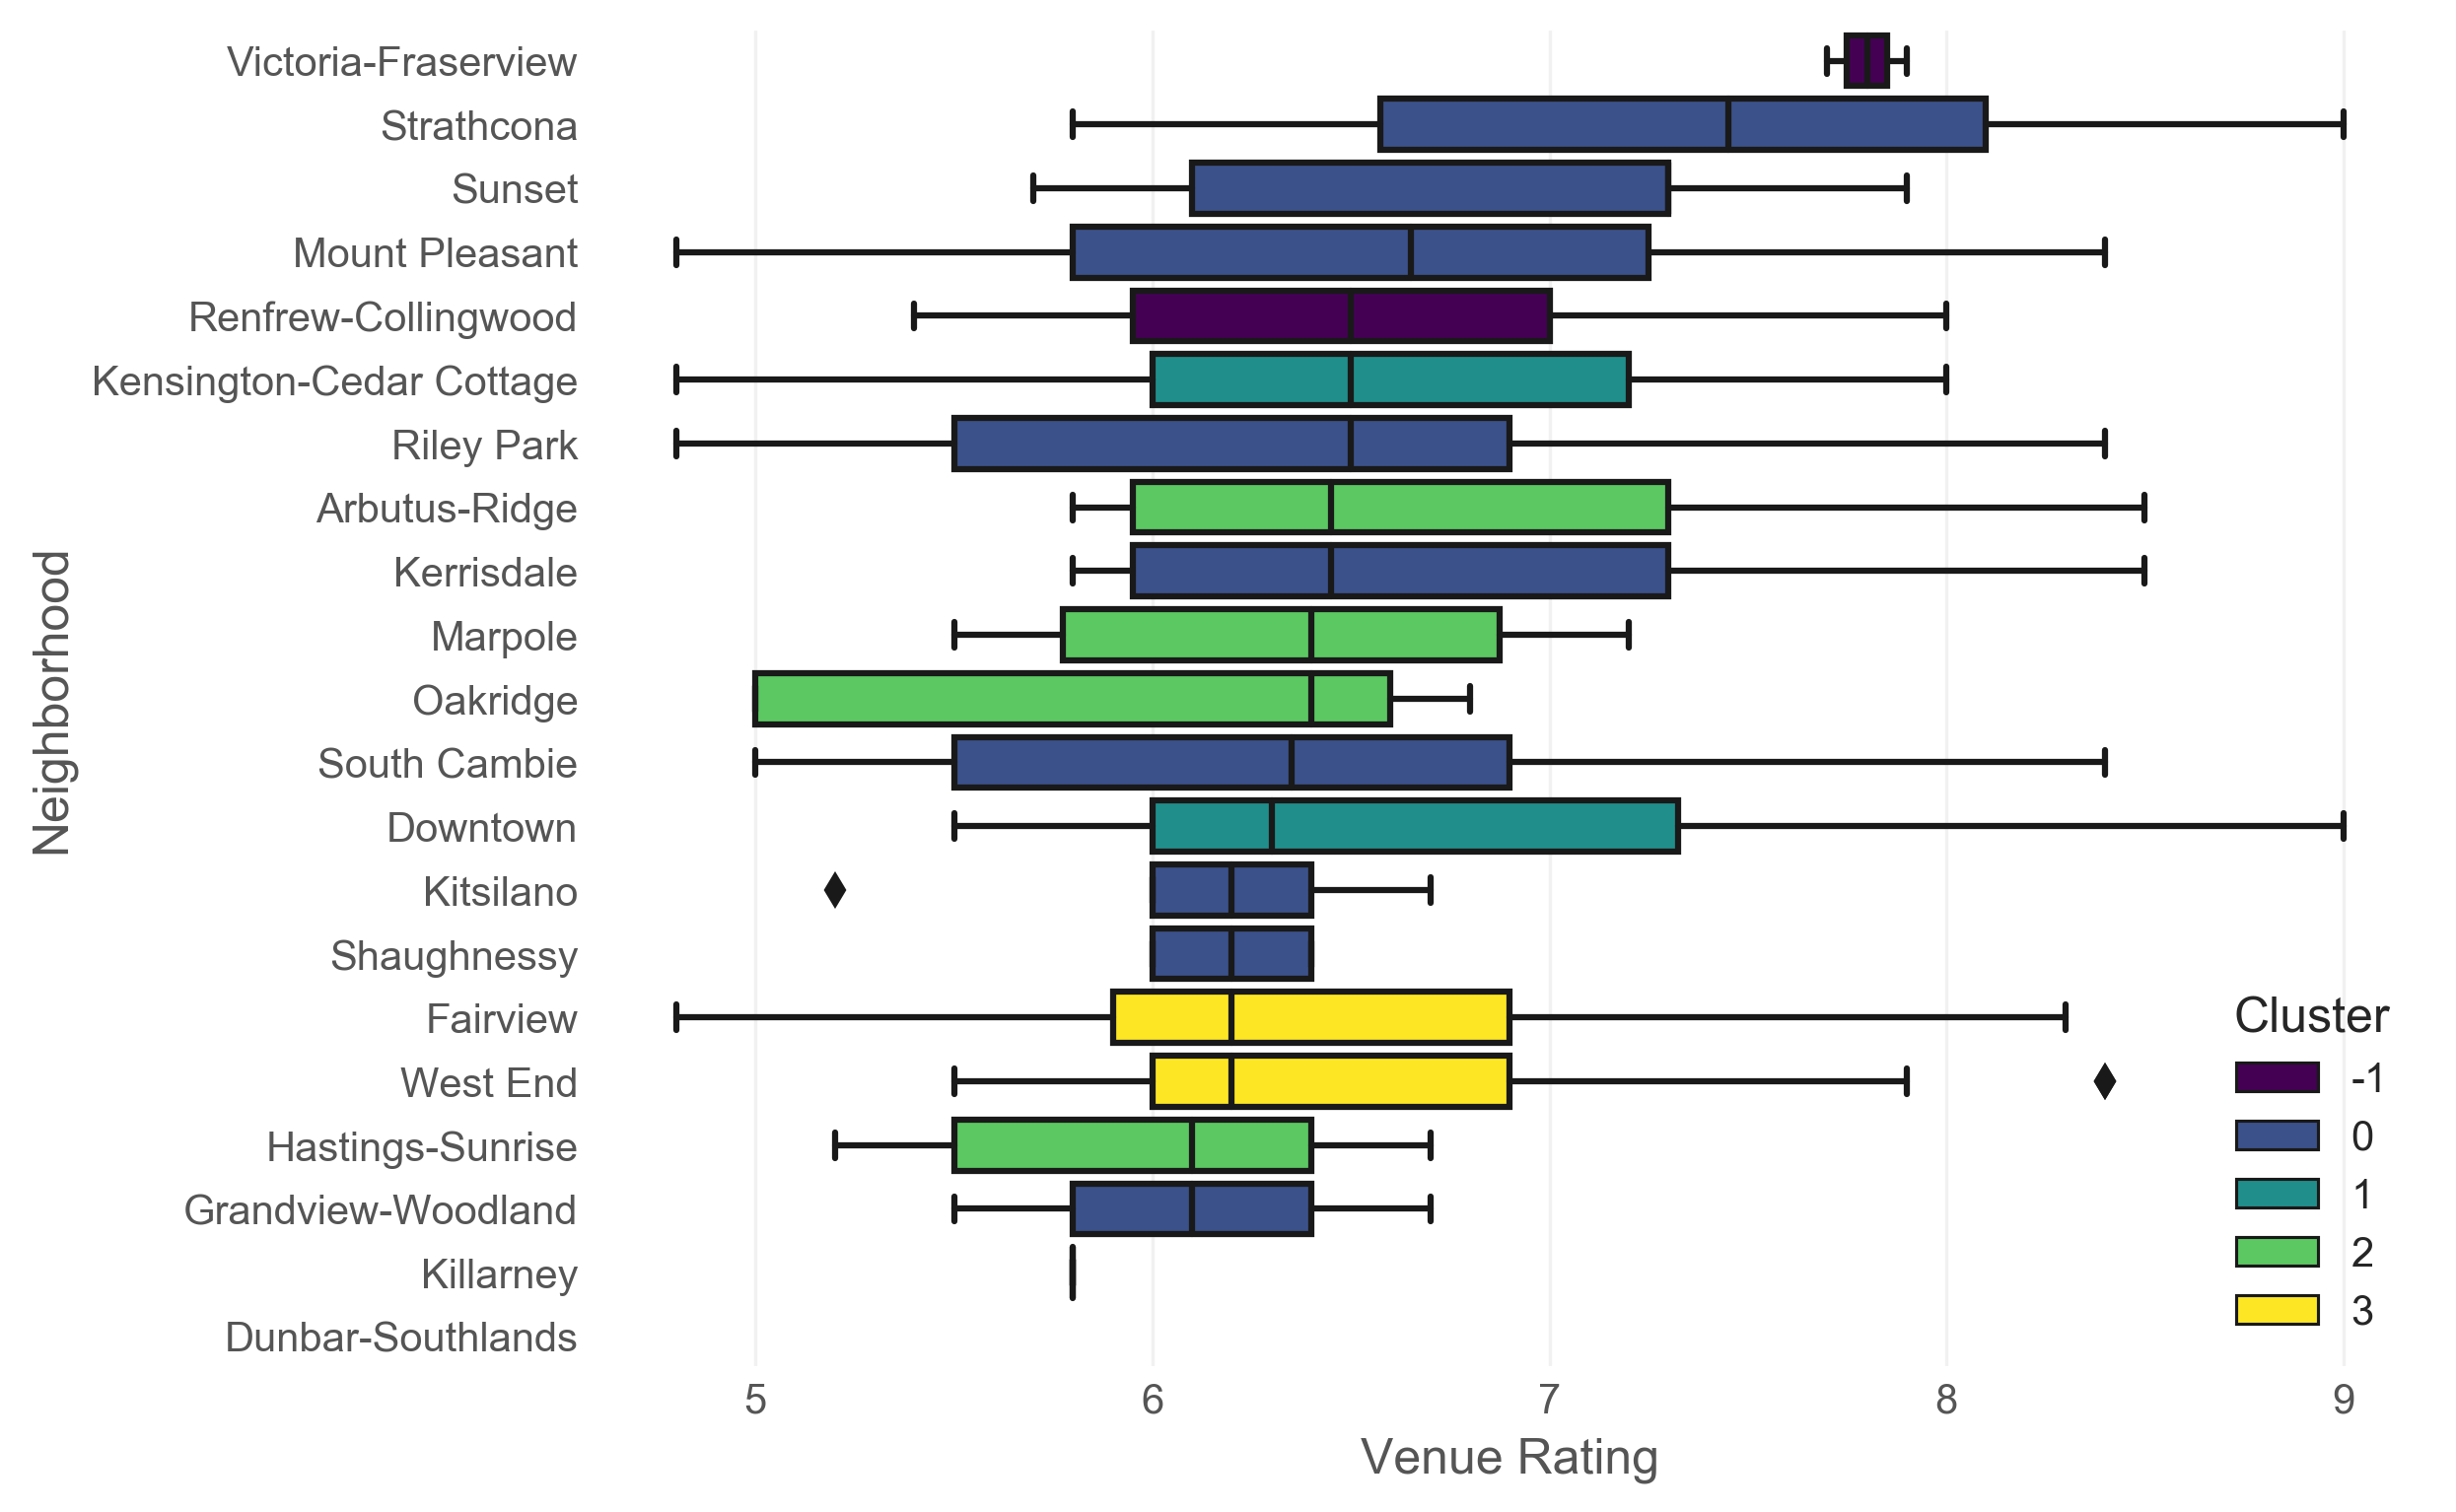

In [720]:
plt.figure(figsize=(8,6), dpi=300)

# grouped boxplot
sns.boxplot(x='Venue Rating', 
            y='Neighborhood', 
            hue='Cluster',
            saturation=1,
            data=boxplot_rating, 
            palette=['#440154', '#3B518A', '#208F8C', '#5BC862', '#FDE724'],
            order=ordered_mrating['Neighborhood'], 
            dodge=False
            )

In [592]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
import bokeh.palettes as bp

In [682]:
bp.small_palettes['Viridis'][5]

['#440154', '#3B518A', '#208F8C', '#5BC862', '#FDE724']

In [706]:
cluster_map = folium.Map(location=[latitude, longitude], 
                    tiles='cartodbpositron',
                    zoom_start=12) # generate map centred around the Conrad Hotel

folium.Choropleth(geo_data=van_json,
                line_color='#66C2A5',
                line_weight=1,
                fill_opacity=0,
                fill_color='#f2f2f2').add_to(cluster_map)

# set color scheme for the clusters
colors = ['#440154', '#3B518A', '#208F8C', '#5BC862', '#FDE724']

markers_colors = []
for lat, lng, name, clu in zip(summary['Latitude'], summary['Longitude'], summary['Neighborhood'], summary['Cluster']):
    label = f'Neighborhood: {name} Cluster: {clu}'
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=colors[clu+1],
        fill=True,
        fill_color=colors[clu+1],
        fill_opacity=0.7,
        parse_html=False).add_to(cluster_map)  

folium.Marker(
    [49.220011, -123.064135],
    popup='Victoria-Fraserview',
    icon=folium.Icon(color='blue', icon='thumbs-up')).add_to(cluster_map) 

cluster_map     

## Results

## Discussion

## Conclusion

## References